In [4]:
## Important Options:
run_epochs =  100 # 100
run_model_type = "semi_y_CCVAE"

run_save_folder = "../../outputs/experiments_test/fashion_mnist/ccvae/" 
run_read_data_folder = "../../data/examples_fashion_mnist/corrupt_level_35_percent/run_1/" # 1 2 3
trust_set_name = "10_samples_per_class" # 5; 10; 25, 50;


In [5]:
ls ../../outputs

experiments_test/


In [6]:
%run ../repair_syserr_models/main.py \
    --cuda-on \
    --save-on \
    --output-folder {run_save_folder} \
    --verbose-metrics-epoch \
    --model-type {run_model_type} \
    --number-epochs {run_epochs} \
    --dataset-folder {run_read_data_folder} \
    --semi-supervise \
    --y-clean-prior 0.6 \
    --lr 1e-3 \
    --q-y-x-coeff 250000.0 \
    --trust-set-name {trust_set_name}


Namespace(activation='relu', batch_size=128, cuda_on=True, data_folder='../../data/examples_fashion_mnist/corrupt_level_35_percent/run_1/', dist_corr_reg=False, dist_corr_reg_coeff=1.0, embedding_size=50, fixed_prior_z_clean=1.0, fixed_prior_z_dirty=5.0, fixed_prior_zy0_sigma=5.0, fixed_prior_zy1_sigma=1.0, kl_anneal=False, kl_anneal_cycles=1, kl_anneal_delay_epochs=5, kl_anneal_ratio=0.5, kl_anneal_start=1e-06, kl_anneal_stop=1.0, kl_beta_const=1.0, l2_reg=0.0, latent_dim=15, layer_size=400, learn_z_given_y_priors=False, load_model=False, load_model_path=None, log_interval=50, lr=0.001, mean_eps_z_in=0.0, model_type='semi_y_CCVAE', number_epochs=100, output_folder='../../outputs/experiments_test/fashion_mnist/ccvae/', q_y_x_coeff=250000.0, qy_sup_weights=None, reg_delay_n_epochs=5, reg_schedule_ratio=0.5, save_on=True, semi_supervise=True, sigma_eps_z_in=0.1, size_input=784, size_output=784, sup_loss_coeff=0.1, train_on_clean_data=False, trust_set_name='10_samples_per_class', use_batc

In [10]:
ls ../../outputs/

experiments_test/


### Define Paths

In [7]:
# Data folder
file_path_data = run_read_data_folder + "train/"

# Experiment / results folder
model_type = run_model_type
file_path_exper = run_save_folder + model_type + "/"

In [11]:
# Check folder of dataset
!ls {file_path_data}/..

cols_info.json	full  noising_info.json  test  train  validation


In [12]:
with open(file_path_data + "y_noise_dict.json") as json_file:
    y_noise_dict_train = json.load(json_file)
    
#trusted_idxs_train = pd.read_csv(file_path_data + "trusted_idxs.csv").values.flatten()
trusted_idxs_train = pd.read_csv(file_path_data + f"/trusted_idxs_{trust_set_name}.csv").values.flatten()

### Check VARS on Notebook

In [13]:
whos

Variable               Type             Data/Info
-------------------------------------------------
StandardTrainer        type             <class 'repair_syserr_mod<...>r_utils.StandardTrainer'>
args                   Namespace        Namespace(activation='rel<...>False, y_clean_prior=0.6)
compute_metrics        function         <function compute_metrics at 0x7fe009072a60>
dict_main_vars         dict             n=51
errno                  module           <module 'errno' (built-in)>
evaluation_phase       function         <function evaluation_phase at 0x7fdec078d0d0>
file_path_data         str              ../../data/examples_fashi<...>l_35_percent/run_1/train/
file_path_exper        str              ../../outputs/experiments<...>mnist/ccvae/semi_y_CCVAE/
frange_cycle_linear    function         <function frange_cycle_linear at 0x7fdec2f34670>
gen_utils              module           <module 'repair_syserr_mo<...>err_models/gen_utils.py'>
json                   module           <module

In [14]:
# debug vars -- from main.py
dict_main_vars.keys()

dict_keys(['args', 'train_loader', 'X_train', 'target_errors_train', 'dataset_obj', 'attributes', 'trusted_mask', 'train_loader_no_shuff', 'valid_loader', 'X_valid', 'target_errors_valid', 'dataset_valid_obj', '_', 'valid_loader_no_shuff', 'test_loader', 'X_test', 'target_errors_test', 'dataset_test_obj', 'test_loader_no_shuff', 'train_clean_loader', 'X_train_clean', 'dataset_obj_train_clean', 'train_clean_loader_no_shuff', 'X_valid_clean', 'dataset_obj_valid_clean', 'valid_clean_loader_no_shuff', 'X_test_clean', 'dataset_obj_test_clean', 'test_clean_loader_no_shuff', 'runin_model', 'model', 'train_optim', 'losses_save', 'kl_anneal', 'kl_beta_n_cycles', 'kl_beta_ratio', 'delay_n_epochs', 'kl_beta_vec', 'reg_schedule_vec', '_train_loader_used', '_train_loader_no_shuff', '_valid_loader_no_shuff', '_test_loader_no_shuff', '_X_train', '_X_valid', '_X_test', 'epoch', 'kl_beta_val', 'reg_schedule_val', 'folder_output', 'outfile'])

### Load Packages 

In [15]:
import pandas as pd
import numpy as np
import torch
import repair_syserr_models.gen_utils as gen_utils
from repair_syserr_models import semi_y_CCVAE
import json

import pprint
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json

### Check Dataset Definitions and Noising

In [16]:
with open(file_path_data + "../noising_info.json") as f:
    dt_defs = json.load(f)
pprint.pprint(dt_defs)


{'defs': {'combs_on': False,
          'max_val': 1,
          'min_val': 0,
          'number_blocks': 4,
          'p_img': 0.35,
          'p_min': 0.5,
          'pixel_val_fixed': None,
          'rand_blocks': True,
          'random_state': None,
          'side_len': 6,
          'std_shift': [10, 10],
          'use_other_patterns': True},
 'name': 'run_1',
 'noise_list_trusted': 'regular',
 'test_size': None,
 'train_size': 0.9,
 'trusted_set': {'dataset_size': 70000,
                 'frac_trusted': None,
                 'mc_mode': 'fixed_number',
                 'min_coverage': True,
                 'n_classes': 18,
                 'percentages': [0.12857142857142856,
                                 0.2571428571428571,
                                 0.6428571428571428,
                                 1.2857142857142856],
                 'samples_fixed': [5, 10, 25, 50],
                 'total_points': [90, 180, 450, 900],
                 'use_labels': 'joint_clas

In [17]:
with open(file_path_data + "../cols_info.json") as f:
    col_defs = json.load(f)
pprint.pprint(col_defs)

{'cat_cols_names': [],
 'dataset_type': 'image',
 'image_defs': {'channel_type': 'gray',
                'channels': [],
                'num_channels': 1,
                'size': [28, 28]},
 'num_cols_names': ['pixel_0',
                    'pixel_1',
                    'pixel_2',
                    'pixel_3',
                    'pixel_4',
                    'pixel_5',
                    'pixel_6',
                    'pixel_7',
                    'pixel_8',
                    'pixel_9',
                    'pixel_10',
                    'pixel_11',
                    'pixel_12',
                    'pixel_13',
                    'pixel_14',
                    'pixel_15',
                    'pixel_16',
                    'pixel_17',
                    'pixel_18',
                    'pixel_19',
                    'pixel_20',
                    'pixel_21',
                    'pixel_22',
                    'pixel_23',
                    'pixel_24',
                   

### Load Datasets

In [18]:
# train
train_loader, X_train, target_errors_train, dataset_obj, attributes, trusted_mask = gen_utils.load_data(args.data_folder, 
                                                                                                        args.batch_size,
                                                                                                        is_train=True,
                                                                                                        get_data_idxs=True,
                                                                                                        semi_sup_data=True,
                                                                                                        use_binary_img=False,
                                                                                                        trust_set_name=trust_set_name)
    

# Dynamic options for dataset_obj (from args)
dataset_obj.use_binary_img = args.use_binary_img


# test
test_loader, X_test, target_errors_test, _, _ = gen_utils.load_data(args.data_folder, 
                                                                    args.batch_size, 
                                                                    is_train=False,
                                                                    use_binary_img=False)

# -> clean versions for evaluation
_, X_train_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                                args.batch_size,
                                                is_train=True, 
                                                is_clean=True, 
                                                stdize_dirty=True,
                                                use_binary_img=False)

_, X_test_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                               args.batch_size, 
                                               is_train=False,
                                               is_clean=True, 
                                               stdize_dirty=True,
                                               use_binary_img=False)


In [19]:
args.data_folder

'../../data/examples_fashion_mnist/corrupt_level_35_percent/run_1/'

In [20]:
y_noise_instance_train = target_errors_train.any(dim=1).numpy()
y_noise_pixels_train = target_errors_train.numpy().reshape(-1,28,28)

y_targets_mdl = ~ torch.from_numpy(y_noise_instance_train).view(-1,1)

x_train_orig = X_train.view(-1,28,28).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means
x_train_clean_orig = X_train_clean.view(-1,28,28).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means


In [21]:
dataset_obj.cont_means

0.2880513707152192

In [22]:
dataset_obj.cont_stds

0.3558276959424768

In [23]:
X_train_clean.view(-1,28,28)

tensor([[[-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         ...,
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095]],

        [[-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         ...,
         [-0.8095, -0.8095, -0.8095,  ...,  0.2485, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.2254, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095]],

        [[-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0

### Load Model

In [24]:
vae_mdl = eval(model_type).VAE(dataset_obj, args)
file_path_model = file_path_exper + "model_params.pth"
vae_mdl.load_state_dict(torch.load(file_path_model))
vae_mdl.eval()

VAE(
  (activ): ReLU()
  (encoder): encMod(
    (encoder): baseEncoder(
      (activ): ReLU()
      (feat_embedd): ModuleList()
      (mod_fw_seq): Sequential(
        (fc_0): Linear(in_features=784, out_features=200, bias=True)
        (activ_0): ReLU()
        (fc_1): Linear(in_features=200, out_features=100, bias=True)
        (activ_1): ReLU()
        (fc_2): Linear(in_features=100, out_features=50, bias=True)
        (activ_2): ReLU()
      )
    )
    (locs): Linear(in_features=50, out_features=16, bias=True)
    (scales): Linear(in_features=50, out_features=16, bias=True)
  )
  (decoder): baseDecoder(
    (activ): ReLU()
    (mod_fw_seq): Sequential(
      (fc_0): Linear(in_features=16, out_features=50, bias=True)
      (activ_0): ReLU()
      (fc_1): Linear(in_features=50, out_features=100, bias=True)
      (activ_1): ReLU()
      (fc_2): Linear(in_features=100, out_features=200, bias=True)
      (activ_2): ReLU()
    )
    (out_cat_linears): Linear(in_features=200, out_feature

### Load Results from Folder

In [25]:
df_train_metrics = pd.read_csv(file_path_exper + "train_epochs_data.csv")
df_valid_metrics = pd.read_csv(file_path_exper + "validation_epochs_data.csv")
df_test_metrics = pd.read_csv(file_path_exper + "test_epochs_data.csv")

In [26]:
!ls {file_path_exper}

args_run.json			train_error_repair_features.csv
model_params.pth		trusted_auc_features.csv
test_auc_features.csv		trusted_avpr_features.csv
test_avpr_features.csv		trusted_epochs_data.csv
test_epochs_data.csv		trusted_error_repair_features.csv
test_error_repair_features.csv	validation_auc_features.csv
train_auc_features.csv		validation_avpr_features.csv
train_avpr_features.csv		validation_epochs_data.csv
train_epochs_data.csv		validation_error_repair_features.csv


In [27]:
df_train_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0        1       584.087565      584.087565            0.0    4.976615   
1        2       460.868602      460.868602            0.0 -106.845335   
2        3       337.202201      337.202201            0.0 -175.335523   
3        4       331.146292      331.146292            0.0 -195.091119   
4        5       159.301538      159.301538            0.0 -217.141957   
..     ...              ...             ...            ...         ...   
95      96      -329.191890     -329.191890            0.0 -376.794309   
96      97      -361.208502     -361.208502            0.0 -388.603390   
97      98      -369.824380     -369.824380            0.0 -395.446225   
98      99      -369.948119     -369.948119            0.0 -395.372292   
99     100      -376.341826     -376.341826            0.0 -401.308500   

    Avg. KLD_TOT  Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0      17.241309   17.241309            0.842158             0.323365   
1      17.456266   17.456266            0.847995             0.349595   
2      19.767807   19.767807            0.869663             0.341065   
3      19.588891   19.588891            0.864764             0.333606   
4      18.655989   18.655989            0.854096             0.354126   
..           ...         ...                 ...                  ...   
95     29.502908   29.502908            0.865357             0.342129   
96     25.777740   25.777740            0.847202             0.280707   
97     24.779556   24.779556            0.844075             0.275281   
98     24.594628   24.594628            0.834593             0.245244   
99     24.160601   24.160601            0.837741             0.272022   

    AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0            0.663527            0.424134               0.611425   
1            0.698872            0.469365               0.597335   
2            0.715722            0.489751               0.646869   
3            0.722520            0.500982               0.701783   
4            0.724300            0.497127               0.797535   
..                ...                 ...                    ...   
95           0.746983            0.537462               0.874713   
96           0.714506            0.492929               0.878216   
97           0.709172            0.481589               0.884516   
98           0.682058            0.448683               0.887914   
99           0.707245            0.478727               0.889495   

    AVPR Row class_y score  Error lower-bound on dirty pos  \
0                 0.408155                        0.379226   
1                 0.413090                        0.323998   
2                 0.479271                        0.287477   
3                 0.528146                        0.281914   
4                 0.719557                        0.274233   
..                     ...                             ...   
95                0.830044                        0.199222   
96                0.826201                        0.195371   
97                0.842370                        0.190903   
98                0.845549                        0.188272   
99                0.848693                        0.189929   

    Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         2.794622                   0.426423   
1                         2.794622                   0.395097   
2                         2.794622                   0.425598   
3                         2.794622                   0.429944   
4                         2.794622                   0.425201   
..                             ...                        ...   
95                        2.794622                   0.625090   
96                        2.794622                   0.776779   
97                        2.794622                   0.815670   
98                        

In [28]:
df_valid_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0        1        22.543744       22.543744            0.0    4.946224   
1        2       -87.842528      -87.842528            0.0 -105.522396   
2        3      -153.987899     -153.987899            0.0 -173.922661   
3        4      -172.858798     -172.858798            0.0 -192.654985   
4        5      -195.407032     -195.407032            0.0 -214.151243   
..     ...              ...             ...            ...         ...   
95      96      -336.554847     -336.554847            0.0 -366.501752   
96      97      -350.661845     -350.661845            0.0 -376.937021   
97      98      -358.203954     -358.203954            0.0 -383.506259   
98      99      -357.887232     -357.887232            0.0 -383.008102   
99     100      -363.965438     -363.965438            0.0 -388.644956   

    Avg. KLD_TOT  Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0      17.240460   17.240460            0.842746             0.323817   
1      17.477843   17.477843            0.856961             0.348984   
2      19.626432   19.626432            0.868032             0.341537   
3      19.500579   19.500579            0.871111             0.333671   
4      18.577815   18.577815            0.858152             0.351693   
..           ...         ...                 ...                  ...   
95     29.437732   29.437732            0.876676             0.340319   
96     25.726171   25.726171            0.853774             0.287939   
97     24.737227   24.737227            0.850293             0.282797   
98     24.551981   24.551981            0.836854             0.253892   
99     24.120789   24.120789            0.838019             0.278417   

    AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0            0.663711            0.428788               0.606225   
1            0.692963            0.463668               0.596900   
2            0.714037            0.482896               0.637307   
3            0.717552            0.490158               0.692717   
4            0.720253            0.487026               0.785943   
..                ...                 ...                    ...   
95           0.742191            0.524249               0.869096   
96           0.712130            0.484506               0.873516   
97           0.707626            0.474685               0.880802   
98           0.679040            0.444117               0.884562   
99           0.704090            0.471381               0.886302   

    AVPR Row class_y score  Error lower-bound on dirty pos  \
0                 0.398978                        0.406403   
1                 0.410116                        0.359008   
2                 0.458521                        0.320521   
3                 0.512852                        0.308045   
4                 0.708545                        0.304643   
..                     ...                             ...   
95                0.821236                        0.217341   
96                0.820198                        0.210585   
97                0.839027                        0.206514   
98                0.841943                        0.205187   
99                0.845510                        0.206103   

    Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         2.805226                   0.454827   
1                         2.805226                   0.428629   
2                         2.805226                   0.460246   
3                         2.805226                   0.455388   
4                         2.805226                   0.456267   
..                             ...                        ...   
95                        2.805226                   0.649635   
96                        2.805226                   0.791814   
97                        2.805226                   0.820643   
98                        

In [29]:
df_test_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0        1        22.554101       22.554101            0.0    4.954721   
1        2       -87.842610      -87.842610            0.0 -105.523324   
2        3      -154.041268     -154.041268            0.0 -173.982729   
3        4      -173.210553     -173.210553            0.0 -192.986947   
4        5      -195.580556     -195.580556            0.0 -214.315033   
..     ...              ...             ...            ...         ...   
95      96      -336.286919     -336.286919            0.0 -366.235862   
96      97      -350.617169     -350.617169            0.0 -376.892964   
97      98      -357.886949     -357.886949            0.0 -383.185518   
98      99      -357.415671     -357.415671            0.0 -382.534272   
99     100      -363.939796     -363.939796            0.0 -388.621196   

    Avg. KLD_TOT  Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0      17.236901   17.236901            0.842746             0.323817   
1      17.478018   17.478018            0.856961             0.348984   
2      19.626443   19.626443            0.868032             0.341537   
3      19.501657   19.501657            0.871111             0.333671   
4      18.578282   18.578282            0.858152             0.351693   
..           ...         ...                 ...                  ...   
95     29.437144   29.437144            0.876676             0.340319   
96     25.722085   25.722085            0.853774             0.287939   
97     24.736377   24.736377            0.850293             0.282797   
98     24.557394   24.557394            0.836854             0.253892   
99     24.118872   24.118872            0.838019             0.278417   

    AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0            0.663711            0.428788               0.606225   
1            0.692963            0.463668               0.596900   
2            0.714037            0.482896               0.637307   
3            0.717552            0.490158               0.692717   
4            0.720253            0.487026               0.785943   
..                ...                 ...                    ...   
95           0.742191            0.524249               0.869096   
96           0.712130            0.484506               0.873516   
97           0.707626            0.474685               0.880802   
98           0.679040            0.444117               0.884562   
99           0.704090            0.471381               0.886302   

    AVPR Row class_y score  Error lower-bound on dirty pos  \
0                 0.398978                        0.406403   
1                 0.410116                        0.359008   
2                 0.458521                        0.320521   
3                 0.512852                        0.308045   
4                 0.708545                        0.304643   
..                     ...                             ...   
95                0.821236                        0.217341   
96                0.820198                        0.210585   
97                0.839027                        0.206514   
98                0.841943                        0.205187   
99                0.845510                        0.206103   

    Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         2.805226                   0.454827   
1                         2.805226                   0.428629   
2                         2.805226                   0.460246   
3                         2.805226                   0.455388   
4                         2.805226                   0.456267   
..                             ...                        ...   
95                        2.805226                   0.649635   
96                        2.805226                   0.791814   
97                        2.805226                   0.820643   
98                        

In [30]:
n_epochs = df_train_metrics.shape[0]
epochs_range = list(range(1,n_epochs+1))

### Train Dataset Final Results

In [31]:
# Train final results
df_train_metrics.loc[n_epochs-1,:]

Epochs                                      100.000000
Avg. TOTAL_LOSS                            -376.341826
Avg. LOSS_ELBO                             -376.341826
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -401.308500
Avg. KLD_TOT                                 24.160601
Avg. KLD_Z                                   24.160601
AUC Cell nll score                            0.837741
AVPR Cell nll score                           0.272022
AUC Row nll score                             0.707245
AVPR Row nll score                            0.478727
AUC Row class_y score                         0.889495
AVPR Row class_y score                        0.848693
Error lower-bound on dirty pos                0.189929
Error upper-bound on dirty pos                2.794622
Error repair on dirty pos                     0.839206
Error repair on clean pos                     0.132018
Error repair on clean pos - dirty points      0.141978
Name: 99, 

In [32]:
# Validation final results
df_valid_metrics.loc[n_epochs-1,:]

Epochs                                      100.000000
Avg. TOTAL_LOSS                            -363.965438
Avg. LOSS_ELBO                             -363.965438
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -388.644956
Avg. KLD_TOT                                 24.120789
Avg. KLD_Z                                   24.120789
AUC Cell nll score                            0.838019
AVPR Cell nll score                           0.278417
AUC Row nll score                             0.704090
AVPR Row nll score                            0.471381
AUC Row class_y score                         0.886302
AVPR Row class_y score                        0.845510
Error lower-bound on dirty pos                0.206103
Error upper-bound on dirty pos                2.805226
Error repair on dirty pos                     0.846321
Error repair on clean pos                     0.136485
Error repair on clean pos - dirty points      0.146526
Name: 99, 

### Test Dataset Final Results

In [33]:
# Train final results
df_test_metrics.loc[n_epochs-1,:]

Epochs                                      100.000000
Avg. TOTAL_LOSS                            -363.939796
Avg. LOSS_ELBO                             -363.939796
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -388.621196
Avg. KLD_TOT                                 24.118872
Avg. KLD_Z                                   24.118872
AUC Cell nll score                            0.838019
AVPR Cell nll score                           0.278417
AUC Row nll score                             0.704090
AVPR Row nll score                            0.471381
AUC Row class_y score                         0.886302
AVPR Row class_y score                        0.845510
Error lower-bound on dirty pos                0.206103
Error upper-bound on dirty pos                2.805226
Error repair on dirty pos                     0.846321
Error repair on clean pos                     0.136485
Error repair on clean pos - dirty points      0.146526
Name: 99, 

## PLOTS TRAIN DATASET

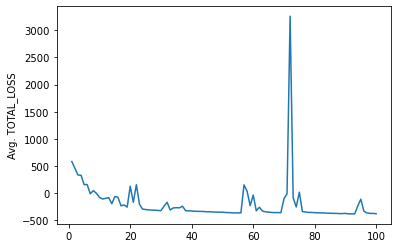

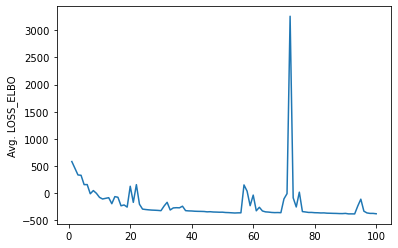

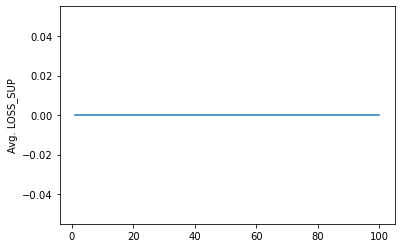

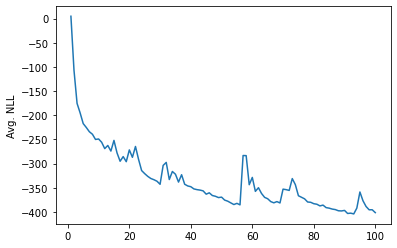

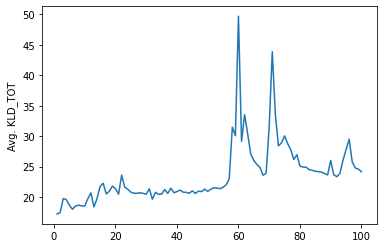

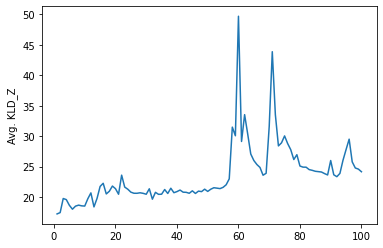

In [34]:
# Plots for losses
for col_name in df_train_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
        plt.show()

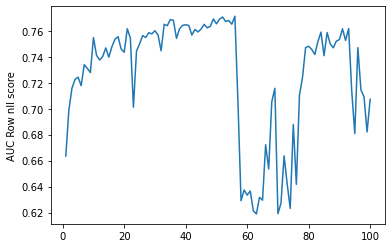

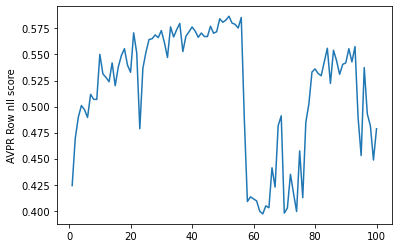

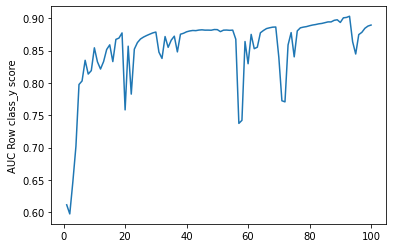

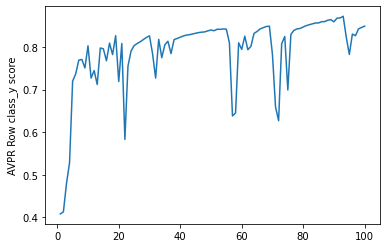

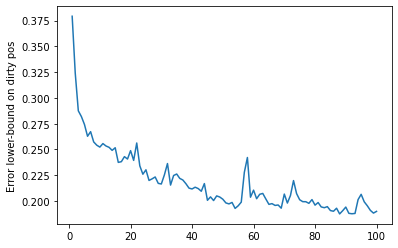

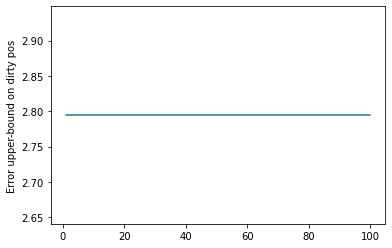

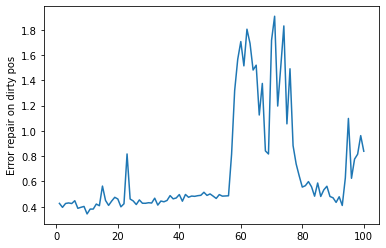

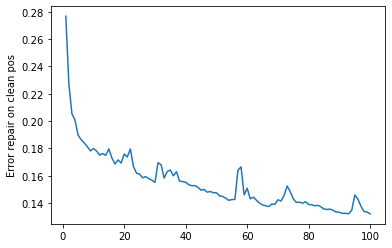

In [35]:
# Plots for classification and repair metrics
list_plot_custom = ["AUC Row nll score", "AVPR Row nll score", 
                    "AUC Row class_y score", "AVPR Row class_y score",
                    "Error lower-bound on dirty pos", "Error upper-bound on dirty pos",
                    "Error repair on dirty pos", "Error repair on clean pos"]

for col_name in list_plot_custom:
    sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
    plt.show()

## Plots Validation -- Losses

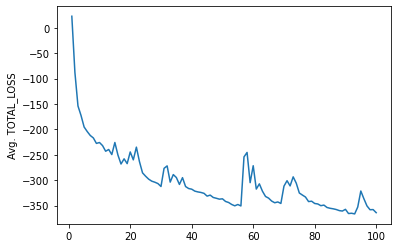

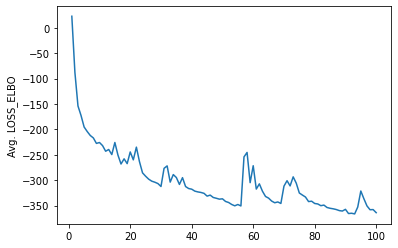

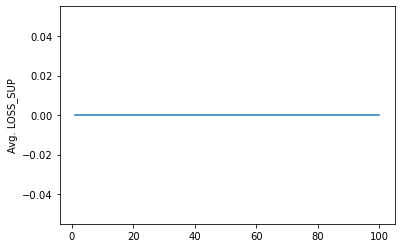

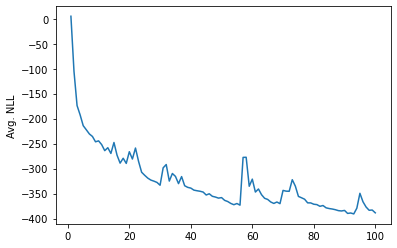

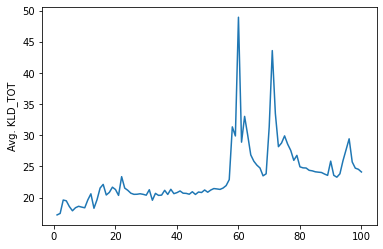

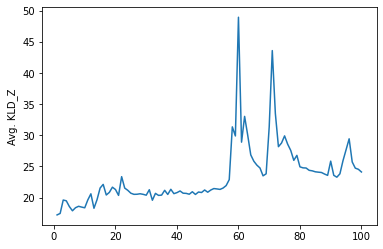

In [36]:
# Plots for losses
for col_name in df_valid_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_valid_metrics[col_name])
        plt.show()

### Plot Test -- Losses

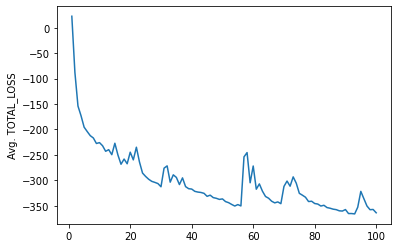

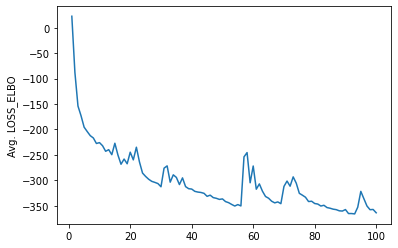

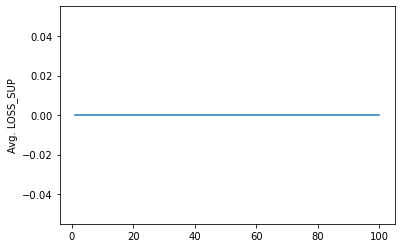

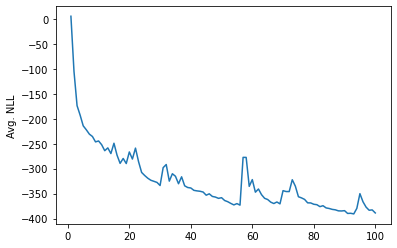

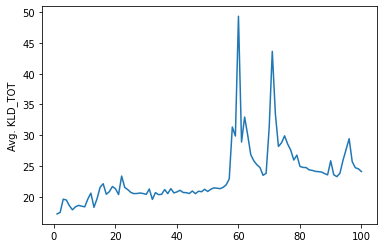

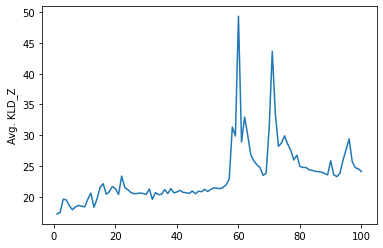

In [37]:
# Plots for losses
for col_name in df_test_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_test_metrics[col_name])
        plt.show()

### Get Recons, Latent Space, etc

In [38]:
vae_p_params_xd, vae_q_params, vae_q_samples, _ = vae_mdl(X_train)
recons_train = vae_p_params_xd['recon']['x'].cpu().detach().numpy()
z_train_clean = vae_q_params['z']['mu'].detach().cpu().numpy() # is z_y1 (clean)
z_train_dirty = vae_q_params['z_y0']['mu'].detach().cpu().numpy() # is z_y0 (dirty)


In [39]:
# Plot mu's and covariance's

z_train_y1_mu = vae_q_params['z']['mu'].detach().cpu().numpy() # is z_y1 (clean)
z_train_y0_mu = vae_q_params['z_y0']['mu'].detach().cpu().numpy() # is z_y0 (dirty)

z_train_y1_var = np.exp(vae_q_params['z']['logvar'].detach().cpu().numpy()) # is z_y1 (clean)
z_train_y0_var = np.exp(vae_q_params['z_y0']['logvar'].detach().cpu().numpy()) # is z_y0 (dirty)

print("median of variances (per dim), clean: \n {} \n".format(np.median(z_train_y1_var, axis=0)))
print("median of variances (per dim), dirty: \n {} \n".format(np.median(z_train_y0_var, axis=0)))

print("median of means (per dim), clean: \n {} \n".format(np.median(z_train_y1_mu, axis=0)))
print("median of means (per dim), dirty: \n {} \n".format(np.median(z_train_y0_mu, axis=0)))

median of variances (per dim), clean: 
 [1.3190343e+02 1.0140405e+00 1.0643042e+00 2.8044009e-01 4.3536527e-03
 1.0446107e+00 2.6996154e-03 9.1644436e-01 9.9924982e-01 9.1350746e-01
 1.2874012e-02 9.8675436e-01 3.6513293e-03 1.5618427e-01 1.0931796e-03
 1.7459058e-03] 

median of variances (per dim), dirty: 
 [6.9676909e+00 1.0140405e+00 1.0643042e+00 2.8044009e-01 4.3536527e-03
 1.0446107e+00 2.6996154e-03 9.1644436e-01 9.9924982e-01 9.1350746e-01
 1.2874012e-02 9.8675436e-01 3.6513293e-03 1.5618427e-01 1.0931796e-03
 1.7459058e-03] 

median of means (per dim), clean: 
 [ 1.7629372e+01 -5.4638535e-02 -1.6166195e-02 -1.0691970e-01
  1.2667263e-01 -3.7639663e-02  1.1188045e-01  9.8226033e-02
 -9.5963188e-02 -4.1217651e-02  2.8361212e-02 -6.9256335e-02
 -1.5452002e-01 -2.3529440e-02 -8.2311600e-02  9.0601206e-02] 

median of means (per dim), dirty: 
 [12.268077   -0.05463853 -0.0161662  -0.1069197   0.12667263 -0.03763966
  0.11188045  0.09822603 -0.09596319 -0.04121765  0.02836121 -0.06

In [47]:
recon_imgs_train = recons_train.reshape(-1,28,28)*dataset_obj.cont_stds + dataset_obj.cont_means

### Show Clean Datapoints at Random

y_noise: 0


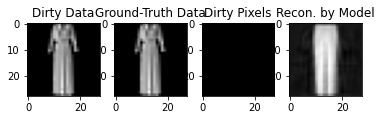

y_noise: 0


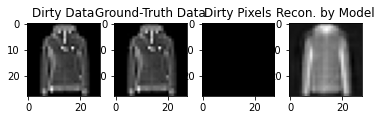

y_noise: 0


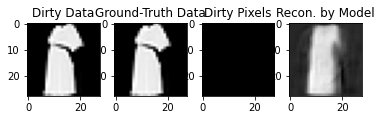

y_noise: 0


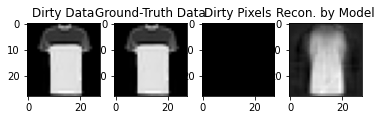

y_noise: 0


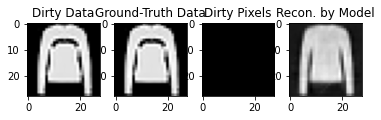

y_noise: 0


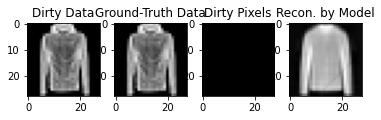

y_noise: 0


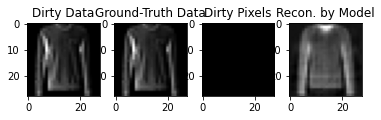

y_noise: 0


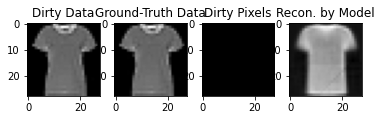

y_noise: 0


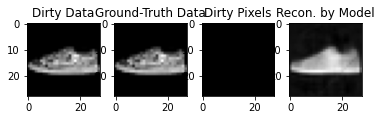

y_noise: 0


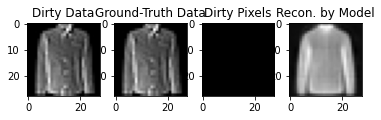

y_noise: 0


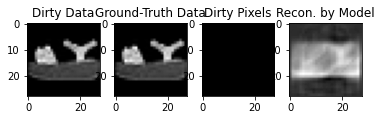

y_noise: 0


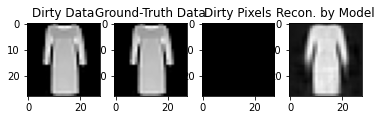

y_noise: 0


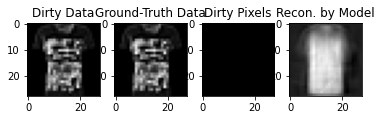

y_noise: 0


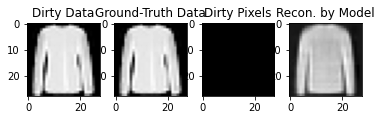

y_noise: 0


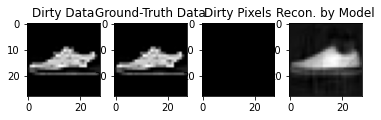

y_noise: 0


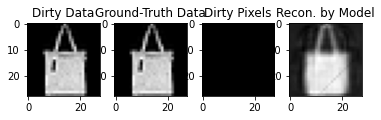

y_noise: 0


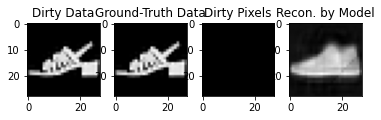

y_noise: 0


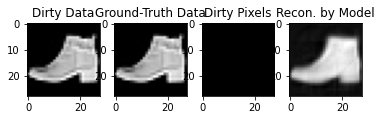

y_noise: 0


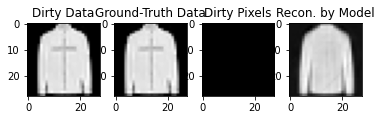

y_noise: 0


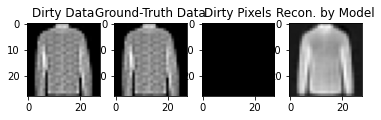

y_noise: 0


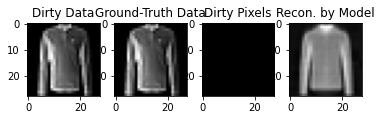

y_noise: 0


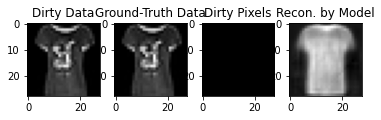

y_noise: 0


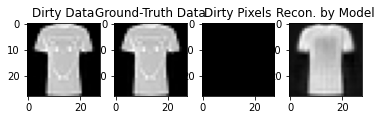

y_noise: 0


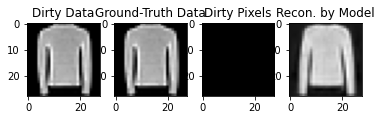

y_noise: 0


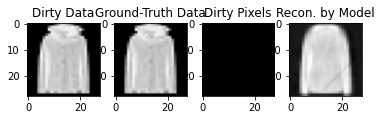

In [48]:
max_imgs_show = 25
y_noise_idxs_train = np.where(~y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show Dirty Datapoints at Random

y_noise: 1


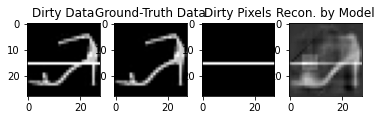

y_noise: 1


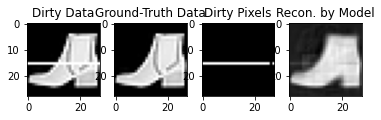

y_noise: 1


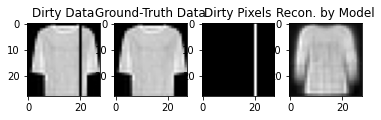

y_noise: 1


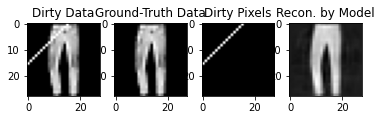

y_noise: 1


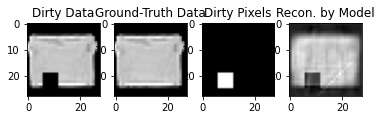

y_noise: 1


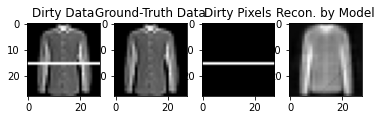

y_noise: 1


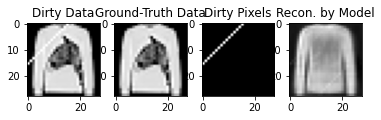

y_noise: 1


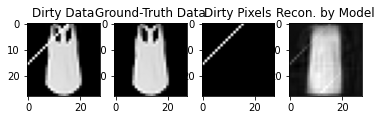

y_noise: 1


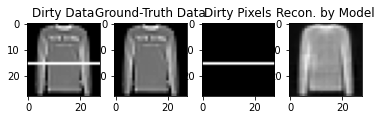

y_noise: 1


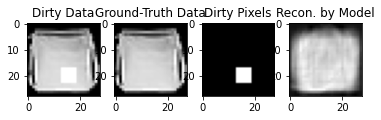

y_noise: 1


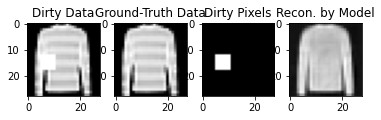

y_noise: 1


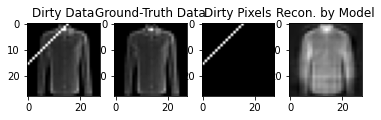

y_noise: 1


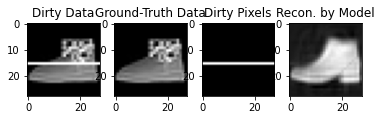

y_noise: 1


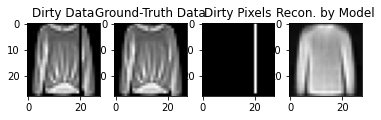

y_noise: 1


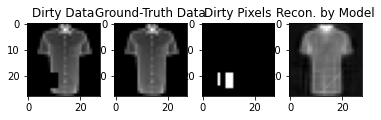

y_noise: 1


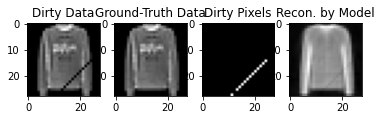

y_noise: 1


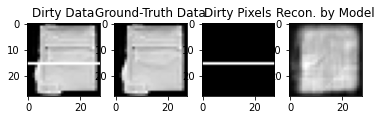

y_noise: 1


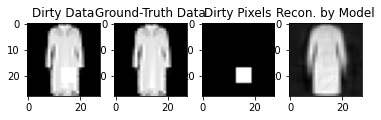

y_noise: 1


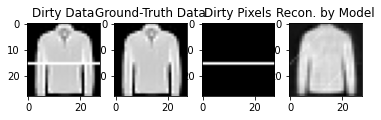

y_noise: 1


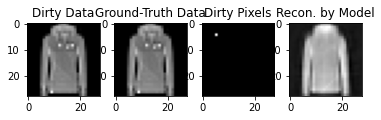

y_noise: 1


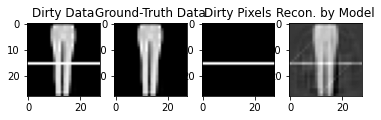

y_noise: 1


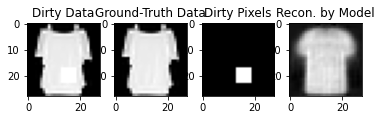

y_noise: 1


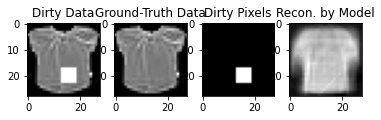

y_noise: 1


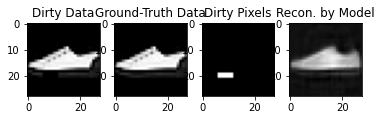

y_noise: 1


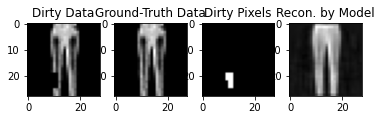

In [49]:
max_imgs_show = 25
y_noise_idxs_train = np.where(y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show per noise type images: y_noise_lists or y_noise_dict

Noise Tag: 0
Noise Indices: 
[49931, 9771, 2510, 33084, 41761, 7530, 38857, 53534, 21939, 14918, 39744, 15426, 32323, 20632, 7050, 4447, 45382, 43836, 889, 11720, 39865, 23198, 11298, 30709, 25732, 51560, 47193, 427, 49007, 30733, 329, 184, 50395, 16263, 15873, 8737, 9298, 20931, 8146, 14359, 29429, 24443, 8078, 5111, 42352, 40877, 34124, 11758, 16969, 35456, 33512, 17311, 31692, 29687, 18192, 354, 14346, 18371, 29243, 5827, 22187, 33753, 22468, 825, 36417, 25156, 6677, 11892, 39455, 28598, 28866, 29012, 49705, 18478, 17475, 29010, 46510, 52853, 3951, 32273, 51429, 38786, 18792, 45433, 41177, 38580, 41392, 43421, 1829, 10511, 46151, 23010, 32478, 40374, 44815, 15102, 33016, 14001, 48481, 14646, 1842, 27806, 24926, 44427, 50380, 21210, 11946, 44239, 47652, 24080, 12759, 17001, 28553, 24581, 45890, 43155, 29797, 18559, 5625, 24354, 50551, 10438, 8258, 18819, 275, 17584, 43356, 51916, 18405, 48138, 30938, 53837, 42044, 14145, 29088, 12916, 49020, 19994, 23257, 1813, 16677, 51223, 39860, 4

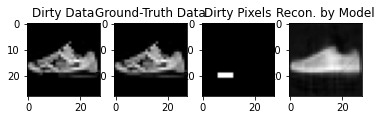

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


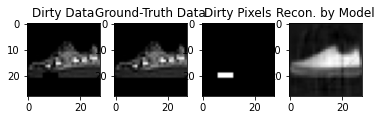

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


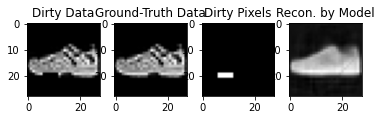

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


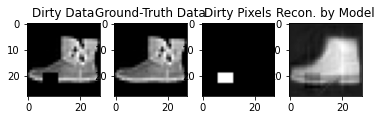

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


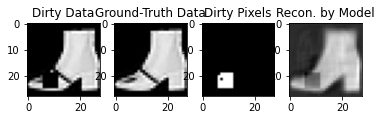

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


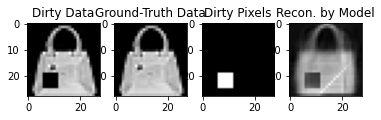

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


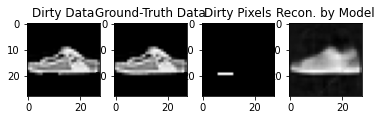

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


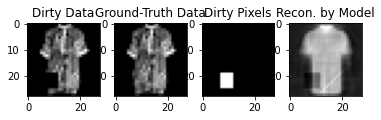

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


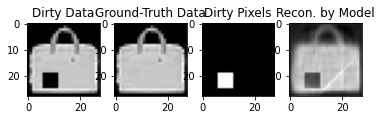

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


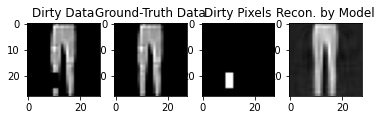







Noise Tag: 1
Noise Indices: 
[2268, 27023, 39295, 17345, 23381, 6724, 21779, 49332, 37763, 12352, 25490, 41004, 12120, 6851, 41191, 52734, 44138, 21195, 4012, 50839, 26136, 27191, 47045, 32952, 32785, 33875, 180, 24843, 24830, 35419, 7378, 1449, 39752, 48949, 20210, 44486, 35491, 42932, 19214, 13789, 40058, 8047, 42606, 47808, 47673, 24398, 11586, 44102, 20568, 1178, 8153, 37296, 29438, 14731, 39789, 17290, 20623, 20929, 7169, 13747, 16563, 4010, 42029, 50463, 47743, 5627, 1226, 42234, 46227, 22186, 18626, 34349, 14634, 4621, 13437, 8454, 9712, 49154, 34317, 53145, 49726, 37859, 33263, 34665, 40696, 41405, 11476, 45200, 7882, 37604, 34107, 35467, 46351, 5691, 7024, 27817, 18010, 34990, 25649, 2467, 7496, 48471, 21818, 43230, 50845, 44807, 14064, 23710, 29736, 10954, 27924, 37189, 17806, 37304, 17359, 31668, 49679, 20145, 8828, 27718, 5125, 9530, 12210, 32245, 17811, 12839, 41861, 21972, 22912, 25390, 2701, 43408, 51433, 48214, 44325, 49314, 22992, 23018, 36675, 12335, 7484, 7078,

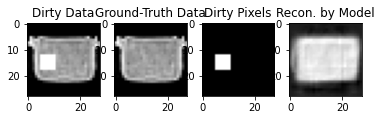

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


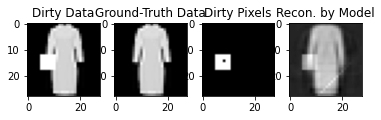

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


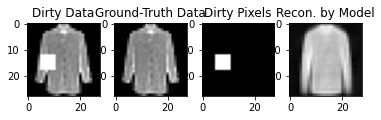

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


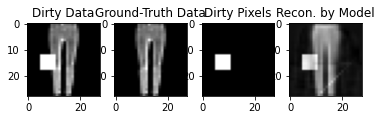

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


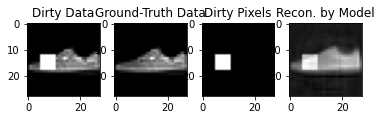

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


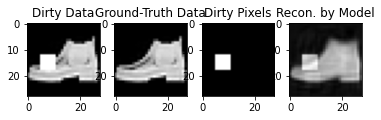

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


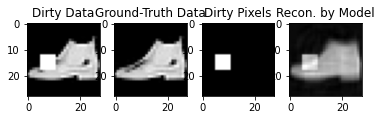

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


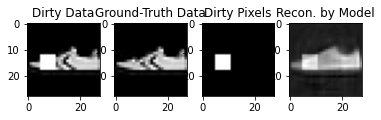

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


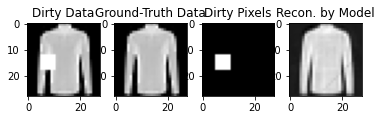

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


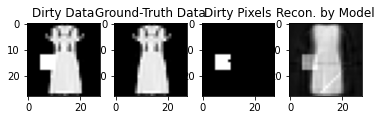







Noise Tag: 2
Noise Indices: 
[52779, 17788, 34554, 13623, 10531, 13700, 33584, 52448, 45317, 20115, 9326, 35823, 34557, 5426, 6829, 44986, 33693, 25305, 40581, 16629, 16001, 48505, 25911, 9510, 5268, 21970, 24585, 32050, 43151, 22268, 36353, 8949, 6303, 48762, 34382, 16466, 18890, 21839, 24773, 17496, 49823, 9462, 41420, 27798, 23594, 44911, 16838, 48332, 33951, 14218, 20845, 42306, 40390, 38054, 48068, 12499, 1548, 45174, 4040, 23881, 43826, 50418, 28417, 27913, 21362, 25921, 11775, 18170, 42183, 3415, 2611, 46995, 24266, 37984, 41214, 20917, 19490, 29409, 31751, 42060, 28040, 42123, 29576, 7119, 27383, 51591, 16515, 14063, 28379, 8023, 25618, 39199, 35583, 6326, 15419, 2340, 49177, 13897, 48046, 8501, 50772, 20143, 37360, 30964, 17317, 27474, 4111, 12250, 42540, 14790, 15091, 38929, 31914, 50222, 31321, 49903, 29467, 41790, 23972, 53082, 27071, 27897, 38879, 26217, 15853, 34636, 5430, 33746, 39250, 13322, 36011, 5819, 8590, 42478, 17616, 14345, 32335, 12681, 32986, 34195, 18549

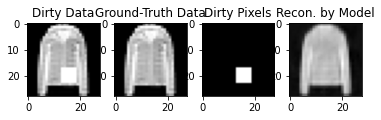

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


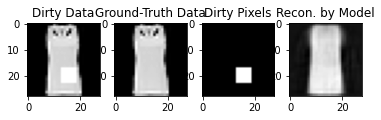

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


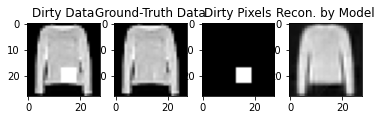

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


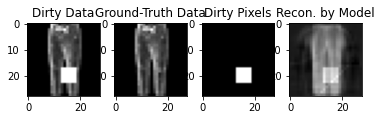

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


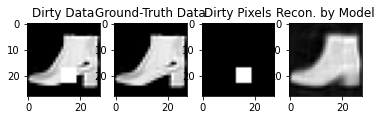

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


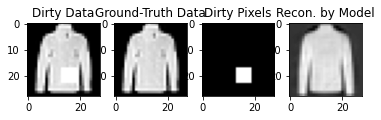

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


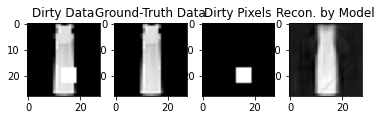

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


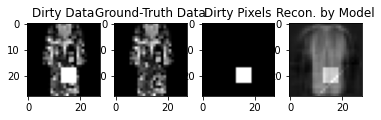

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


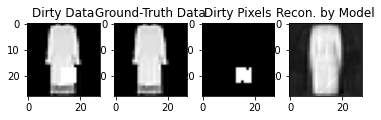

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


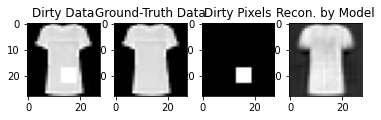







Noise Tag: 3
Noise Indices: 
[5853, 11247, 42551, 7181, 16971, 50044, 51782, 14722, 29140, 37744, 25137, 53907, 10840, 14324, 16757, 53262, 41469, 17974, 15416, 24707, 37293, 38816, 10987, 22127, 2641, 49496, 15671, 46066, 19139, 41891, 28160, 25336, 46399, 42703, 45763, 5178, 3483, 20680, 18845, 47719, 28075, 19678, 36318, 32345, 52609, 11071, 10666, 3146, 27766, 33779, 50527, 41442, 32319, 11920, 49201, 13393, 32048, 2091, 25676, 15667, 33091, 34035, 44390, 11182, 41226, 48094, 6797, 22581, 31176, 15013, 46307, 43893, 46453, 19705, 24350, 50379, 17524, 31972, 42550, 27037, 40082, 10809, 33896, 36274, 43520, 2846, 20520, 52770, 87, 26287, 22785, 30434, 16825, 48967, 24420, 6168, 46186, 37347, 45750, 48761, 49970, 41902, 34316, 3986, 52396, 19508, 37782, 45893, 34641, 33108, 32615, 30878, 8517, 28092, 3382, 43271, 3782, 2159, 12477, 51915, 5820, 25592, 32593, 8429, 25471, 33774, 47607, 25334, 283, 46247, 22726, 8026, 43521, 31427, 8226, 28153, 44405, 29219, 25611, 50983, 11965, 4

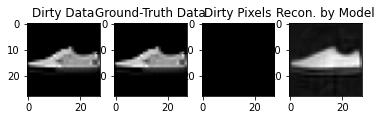

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


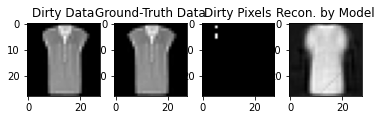

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


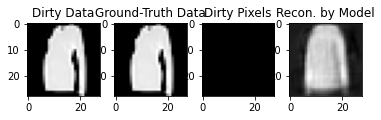

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


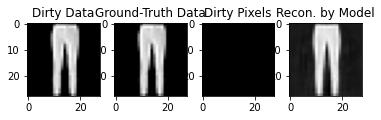

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


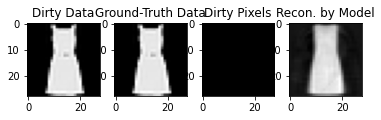

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


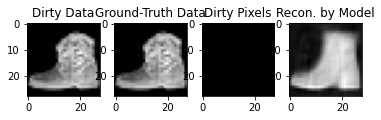

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


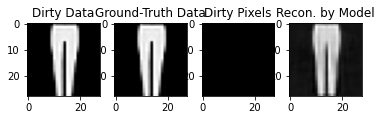

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


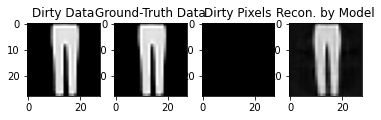

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


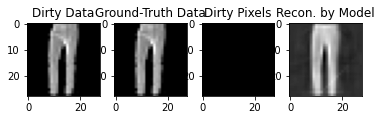

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


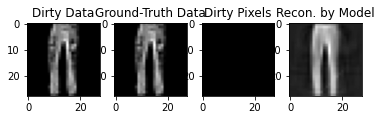







Noise Tag: 4
Noise Indices: 
[48575, 31148, 48450, 33830, 7987, 10979, 1890, 18322, 19790, 45950, 7745, 3091, 23937, 53797, 25488, 44933, 51698, 48005, 17100, 1365, 19039, 4002, 37067, 17886, 32907, 43312, 51657, 6153, 3318, 42061, 22969, 9812, 8061, 1077, 27400, 35271, 39484, 24516, 30069, 45491, 46324, 18508, 12583, 9978, 21282, 44903, 17853, 41611, 23748, 2369, 27320, 38491, 46181, 47549, 11944, 39121, 47470, 4845, 6150, 22136, 20136, 7640, 19879, 36558, 30010, 11538, 23295, 43274, 12090, 35806, 36044, 28327, 30707, 52095, 9025, 13832, 14662, 53234, 23949, 51981, 37775, 48746, 8821, 23859, 32559, 1272, 24058, 4869, 6784, 35433, 31126, 7079, 51871, 32266, 6666, 22040, 44831, 25763, 17982, 29302, 15324, 51808, 4417, 45326, 14601, 35863, 30904, 5610, 47043, 53370, 35717, 16154, 41557, 14105, 37807, 37335, 2009, 15439, 30029, 41156, 4303, 41094, 22388, 12831, 8792, 43175, 35699, 5881, 45136, 22659, 30368, 43694, 11220, 13492, 43669, 6849, 46615, 51712, 3833, 22157, 18750, 19896, 2

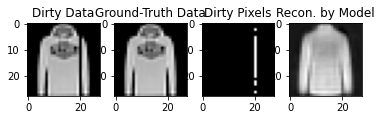

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 4


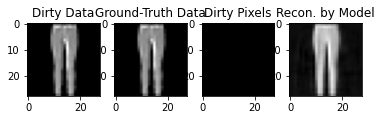

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


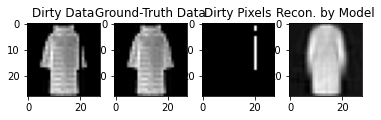

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


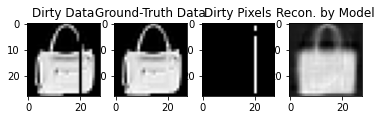

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


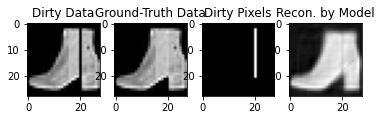

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


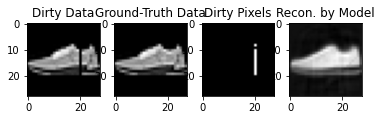

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


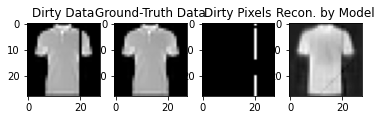

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


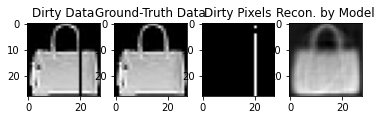

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 4


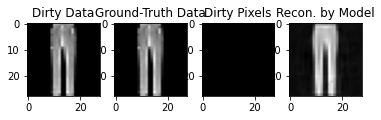

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


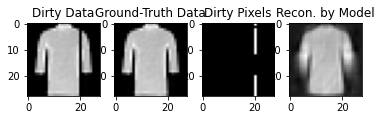







Noise Tag: 5
Noise Indices: 
[41366, 35857, 21758, 42930, 12425, 8919, 20074, 21360, 50284, 28505, 15387, 39772, 36500, 27442, 25985, 34272, 53223, 47175, 49465, 34404, 13910, 10124, 31626, 10920, 21897, 45556, 48088, 927, 43309, 27611, 16062, 4233, 20249, 25116, 36367, 11843, 3978, 4677, 22660, 43990, 31854, 34732, 53976, 3017, 1199, 49324, 44998, 27176, 11041, 18810, 29453, 34407, 4060, 17860, 20989, 15437, 10472, 2443, 9296, 13823, 17272, 24867, 10225, 27133, 32026, 17337, 35463, 34341, 41976, 29866, 35635, 24225, 14893, 45092, 47172, 347, 26071, 9039, 9220, 45828, 52221, 34739, 44667, 3012, 9371, 5393, 18051, 11131, 53536, 17752, 12194, 13315, 19093, 36948, 1780, 49077, 2266, 9322, 5217, 48240, 16182, 17219, 20798, 31912, 48181, 9518, 3780, 2652, 9397, 10342, 23460, 12787, 9150, 45606, 18477, 21612, 2721, 42149, 47290, 21396, 24486, 38086, 39885, 6469, 41985, 17023, 7632, 45420, 3602, 7466, 11383, 50371, 36845, 49424, 17898, 41024, 53137, 43949, 30608, 51186, 29372, 37628, 98

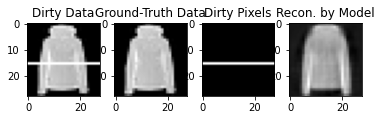

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


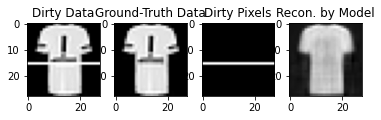

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


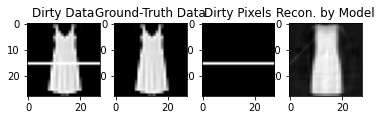

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


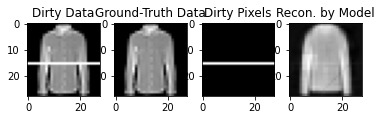

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


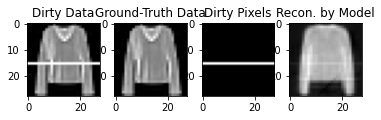

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


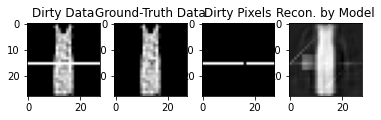

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


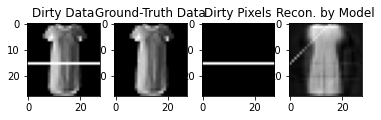

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


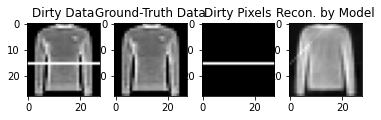

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


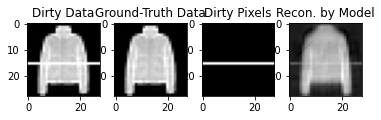

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


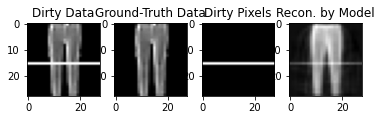







Noise Tag: 6
Noise Indices: 
[7450, 18091, 53161, 49480, 23297, 20825, 49950, 46922, 31791, 47239, 2759, 29933, 3967, 27056, 21588, 45917, 35274, 28391, 21857, 29897, 36213, 6516, 176, 35957, 31686, 6767, 35148, 34819, 49806, 7968, 32919, 10499, 53674, 11399, 46287, 8599, 1729, 26381, 47936, 19166, 14568, 49535, 26586, 34736, 32886, 37672, 13489, 44418, 19345, 24421, 36282, 33142, 3854, 10495, 36854, 44158, 19598, 621, 36704, 43908, 48847, 823, 48437, 43716, 49681, 37730, 52382, 12448, 35422, 24209, 50860, 29120, 14162, 44408, 49481, 23573, 24712, 26799, 37463, 24717, 24821, 52078, 33064, 21141, 6801, 36890, 36035, 4969, 45019, 41325, 39141, 23507, 29859, 42837, 7630, 26319, 44862, 13728, 42802, 41813, 4038, 30978, 33337, 8563, 8976, 1406, 53428, 14458, 38137, 52549, 16744, 50805, 53725, 49838, 41342, 15843, 4019, 23533, 5488, 14925, 19596, 23903, 29812, 1516, 22518, 45516, 11517, 1356, 8787, 8262, 47513, 20215, 27697, 44719, 2471, 12564, 16003, 53466, 18288, 11959, 41042, 7215, 

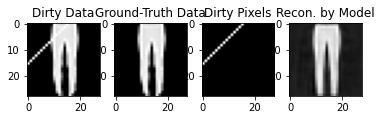

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


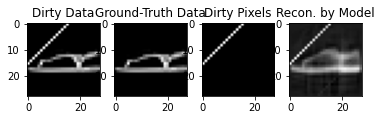

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


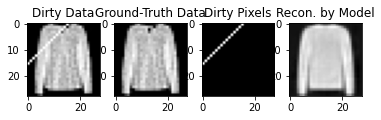

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


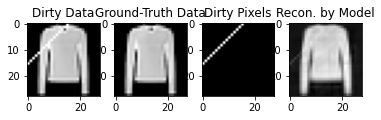

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


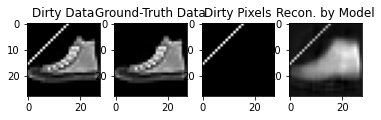

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


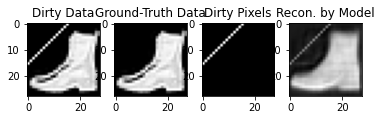

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


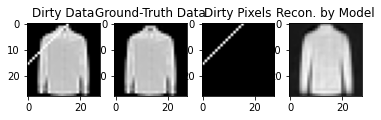

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


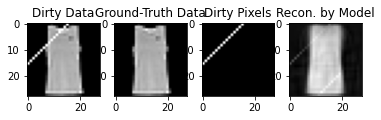

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


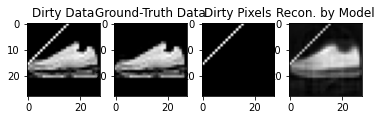

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


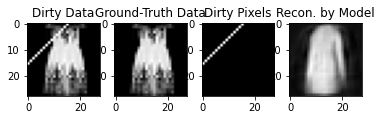







Noise Tag: 7
Noise Indices: 
[24116, 1936, 30892, 436, 45639, 12774, 7036, 15748, 42345, 33410, 6895, 30732, 44321, 32808, 4941, 3345, 41802, 19475, 31290, 1214, 7779, 42162, 12423, 9815, 40017, 48751, 52087, 15935, 52165, 44593, 22784, 39842, 19136, 28107, 11035, 19283, 38796, 5210, 33783, 13330, 43729, 44077, 32772, 46487, 22866, 37235, 46813, 31233, 24933, 36083, 24674, 11357, 19472, 22532, 9783, 3935, 23688, 1962, 16373, 44872, 28605, 48475, 19844, 18389, 33815, 31561, 52914, 41207, 32861, 52985, 49168, 50930, 26936, 37179, 51109, 12670, 7236, 37932, 30604, 42300, 31331, 53210, 45128, 44003, 10767, 1135, 43785, 45199, 45450, 30053, 9551, 31890, 38569, 42981, 12302, 36436, 11922, 26980, 36273, 33525, 44014, 20494, 5607, 22666, 52979, 3543, 49510, 44165, 33109, 31596, 40989, 43148, 26160, 26950, 10551, 11271, 42268, 25520, 2275, 27541, 2255, 52100, 37045, 46475, 17222, 10502, 11094, 5412, 8347, 46890, 30175, 19604, 42317, 24251, 28590, 38278, 22985, 25298, 31439, 5236, 15862, 2

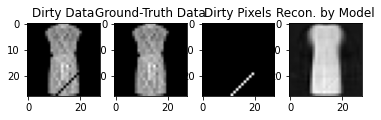

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


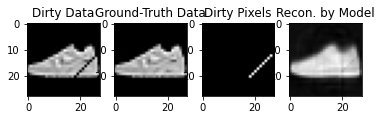

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


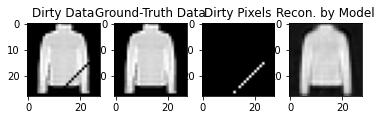

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


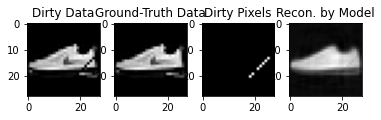

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


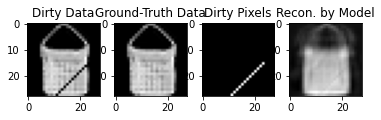

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


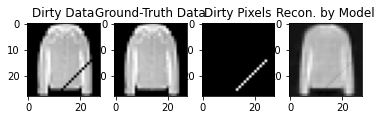

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


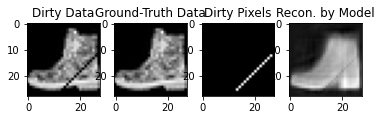

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


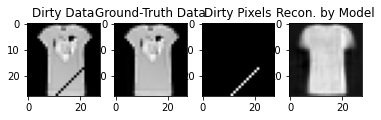

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


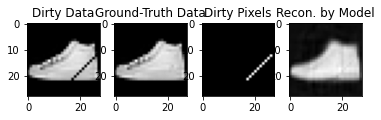

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


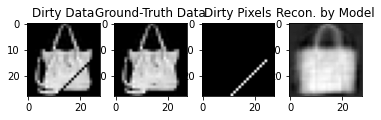

In [50]:
## show per noise type images: y_noise_lists or y_noise_dict

max_show_n = 10

for noise_key, noise_idxs in y_noise_dict_train.items():
    
    print("Noise Tag: {}".format(noise_key))
    print("Noise Indices: \n{}".format(noise_idxs))
    
    _selected_idxs = np.random.permutation(noise_idxs)[:max_show_n]
    
    for idx in _selected_idxs:
    
        print("y_class (clean): {} | y_noise: {} | y_noise_tag (noise type): {}".format(
            0, y_noise_instance_train[idx], noise_key)) # y_class_train[idx]
        fig, ax = plt.subplots(1,4)
        ax[0].imshow(x_train_orig[idx,...],cmap="gray")
        ax[0].set_title("Dirty Data")
        ax[1].imshow(x_train_clean_orig[idx,...],cmap="gray")
        ax[1].set_title("Ground-Truth Data")
        ax[2].imshow(y_noise_pixels_train[idx,...],cmap="gray")
        ax[2].set_title("Dirty Pixels")
        #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].set_title("Recon. by Model")
        plt.show()
        
    print("\n\n\n\n\n")


### Show Trusted Set (Clean Ground-Truth, Train Data, Recon)

In [51]:
len(trusted_idxs_train)

180

y_noise: 0


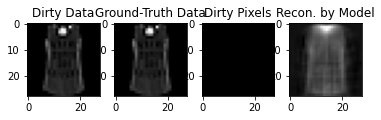

y_noise: 0


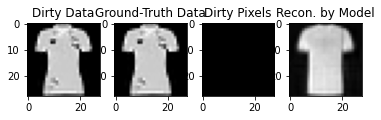

y_noise: 0


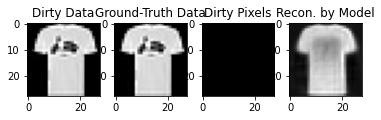

y_noise: 0


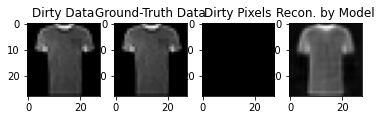

y_noise: 0


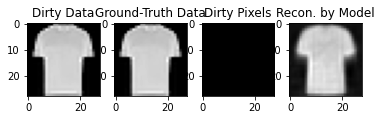

y_noise: 0


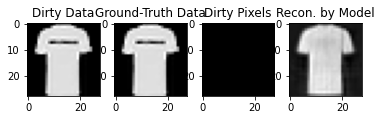

y_noise: 0


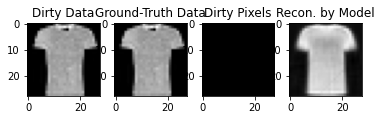

y_noise: 0


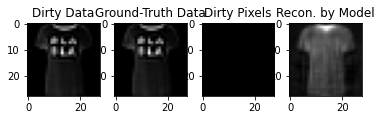

y_noise: 0


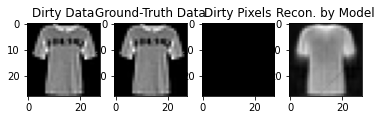

y_noise: 0


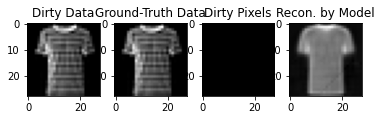

y_noise: 0


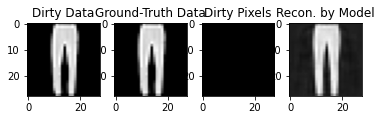

y_noise: 0


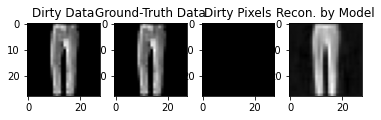

y_noise: 0


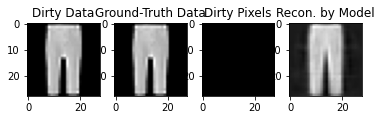

y_noise: 0


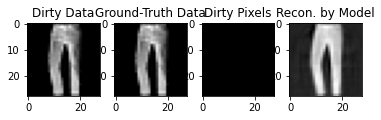

y_noise: 0


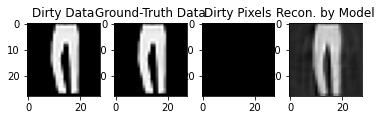

y_noise: 0


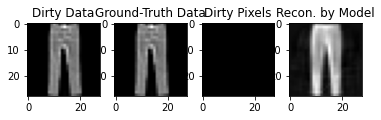

y_noise: 0


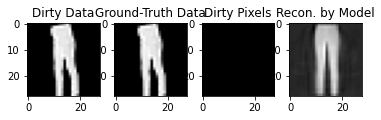

y_noise: 0


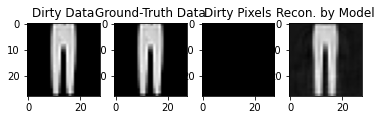

y_noise: 0


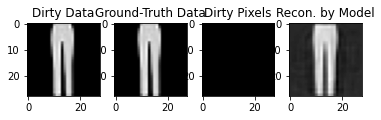

y_noise: 0


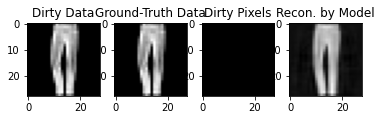

y_noise: 0


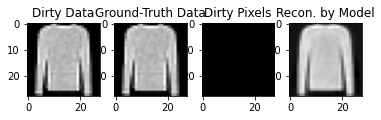

y_noise: 0


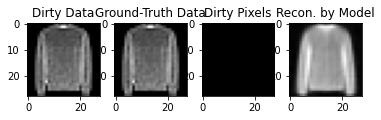

y_noise: 0


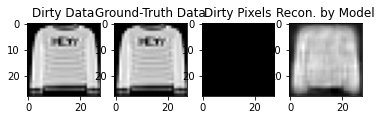

y_noise: 0


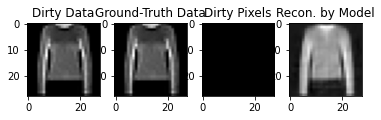

y_noise: 0


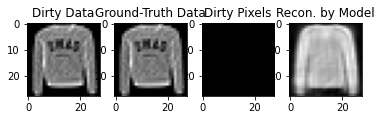

y_noise: 0


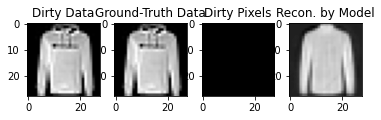

y_noise: 0


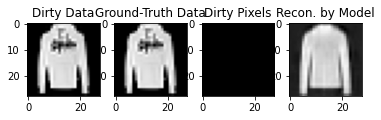

y_noise: 0


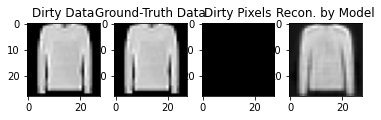

y_noise: 0


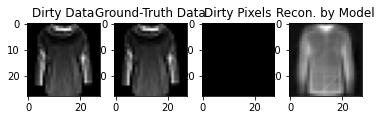

y_noise: 0


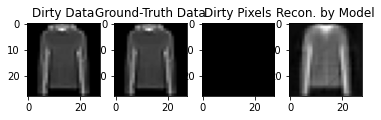

y_noise: 0


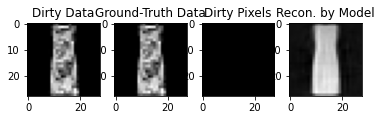

y_noise: 0


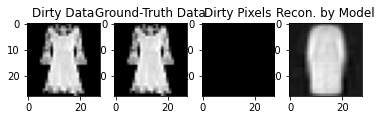

y_noise: 0


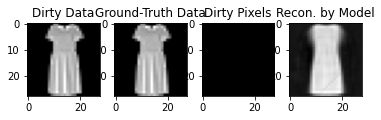

y_noise: 0


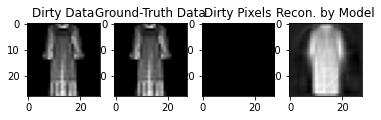

y_noise: 0


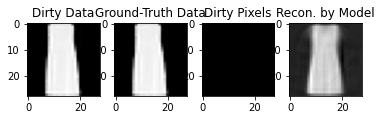

y_noise: 0


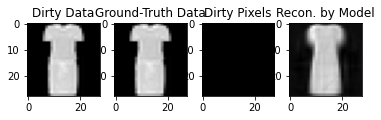

y_noise: 0


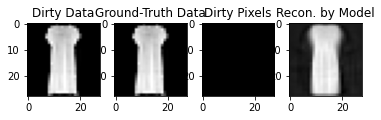

y_noise: 0


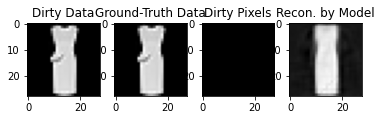

y_noise: 0


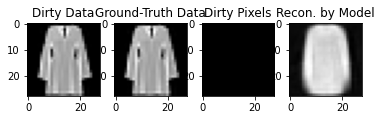

y_noise: 0


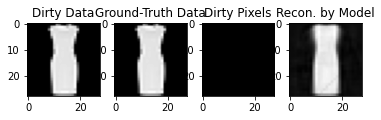

y_noise: 0


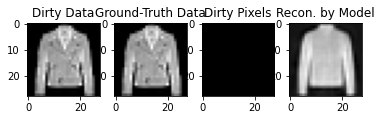

y_noise: 0


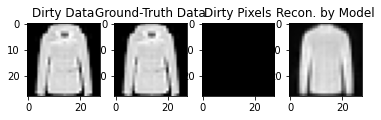

y_noise: 0


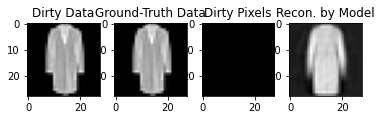

y_noise: 0


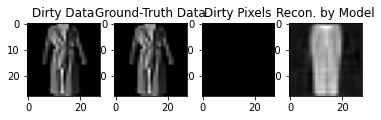

y_noise: 0


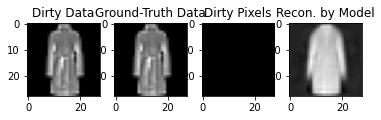

y_noise: 0


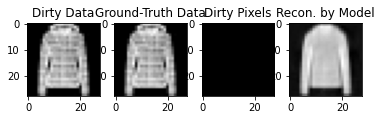

y_noise: 0


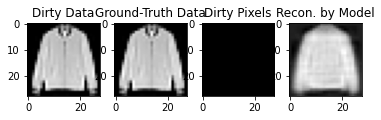

y_noise: 0


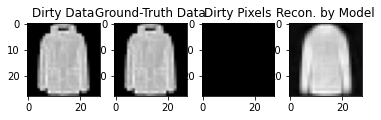

y_noise: 0


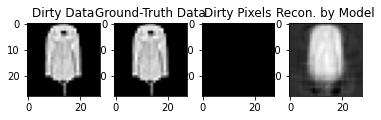

y_noise: 0


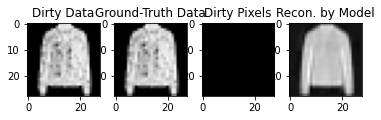

y_noise: 0


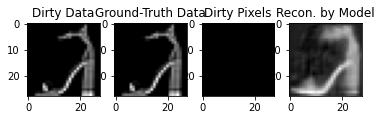

y_noise: 0


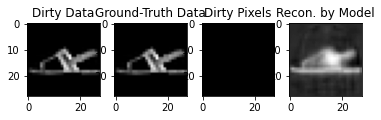

y_noise: 0


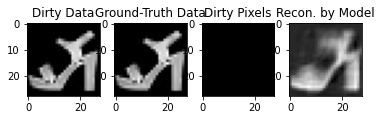

y_noise: 0


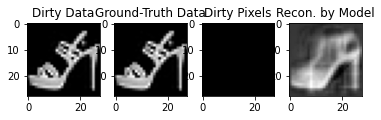

y_noise: 0


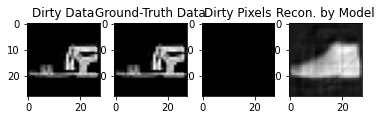

y_noise: 0


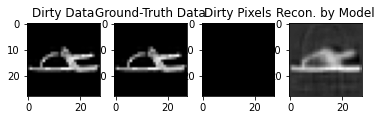

y_noise: 0


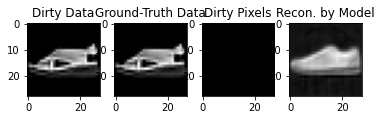

y_noise: 0


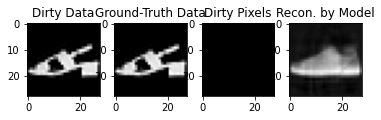

y_noise: 0


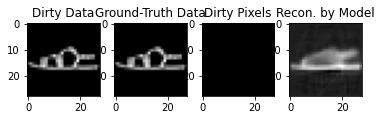

y_noise: 0


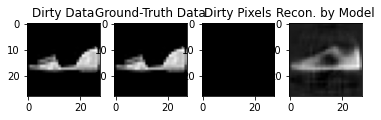

y_noise: 0


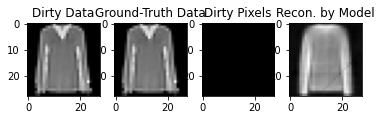

y_noise: 0


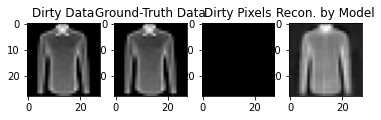

y_noise: 0


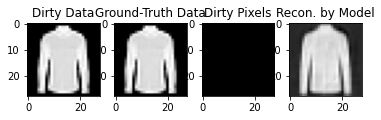

y_noise: 0


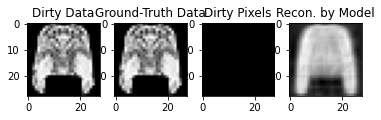

y_noise: 0


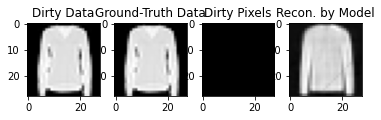

y_noise: 0


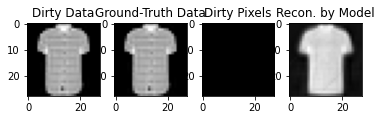

y_noise: 0


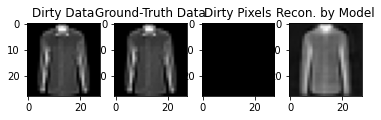

y_noise: 0


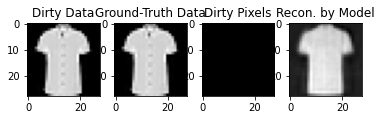

y_noise: 0


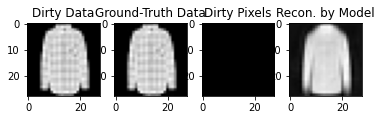

y_noise: 0


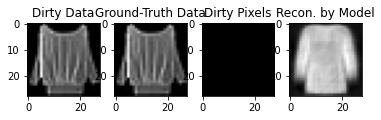

y_noise: 0


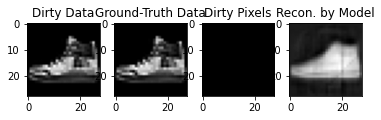

y_noise: 0


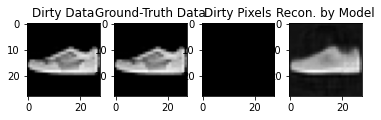

y_noise: 0


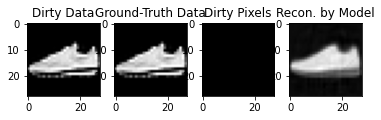

y_noise: 0


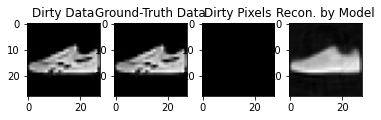

y_noise: 0


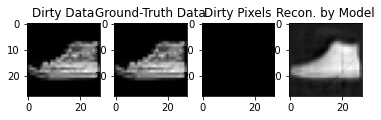

y_noise: 0


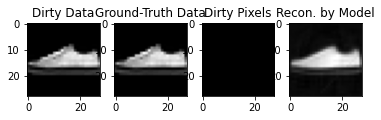

y_noise: 0


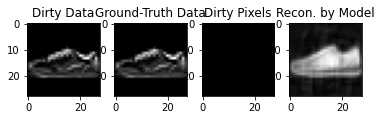

y_noise: 0


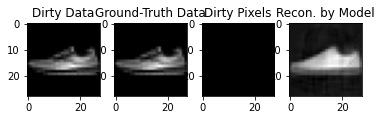

y_noise: 0


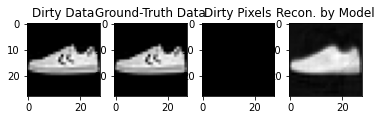

y_noise: 0


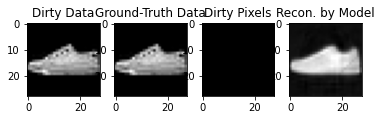

y_noise: 0


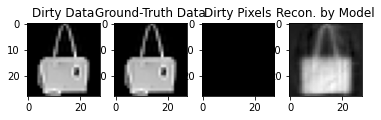

y_noise: 0


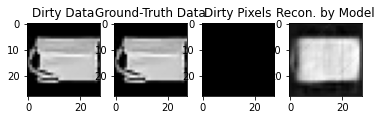

y_noise: 0


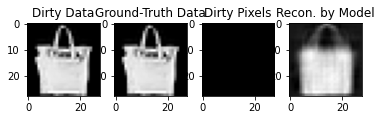

y_noise: 0


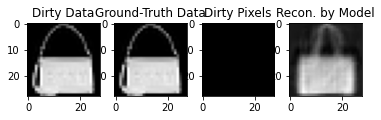

y_noise: 0


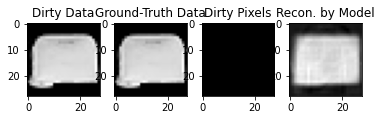

y_noise: 0


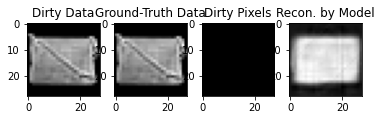

y_noise: 0


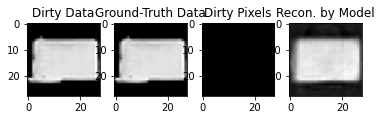

y_noise: 0


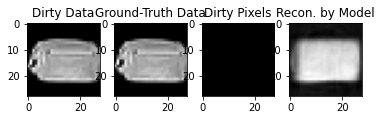

y_noise: 0


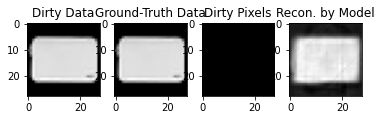

y_noise: 0


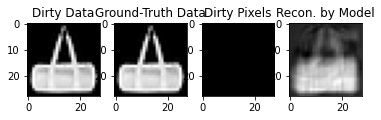

y_noise: 0


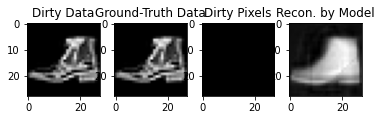

y_noise: 0


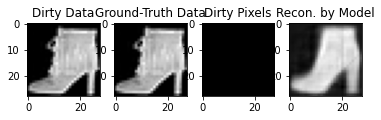

y_noise: 0


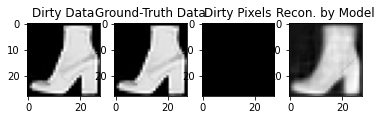

y_noise: 0


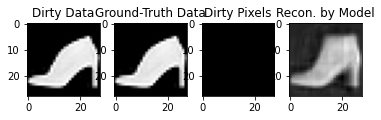

y_noise: 0


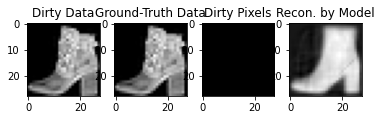

y_noise: 0


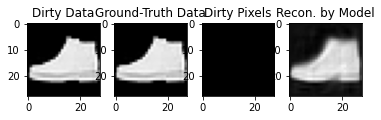

y_noise: 0


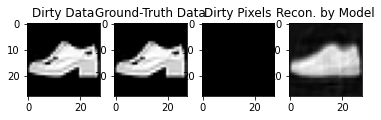

y_noise: 0


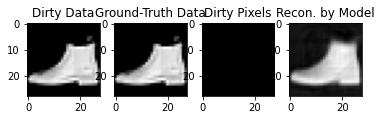

y_noise: 0


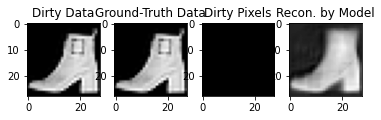

y_noise: 0


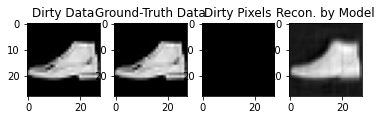

y_noise: 1


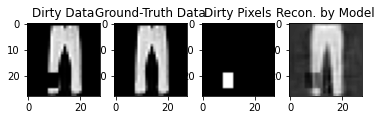

y_noise: 1


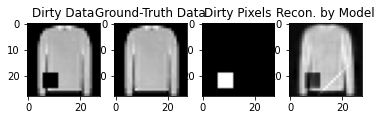

y_noise: 1


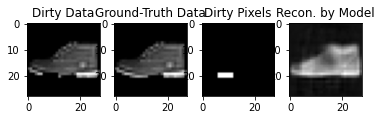

y_noise: 1


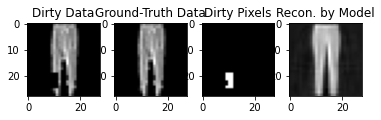

y_noise: 1


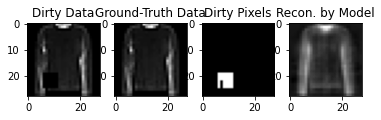

y_noise: 1


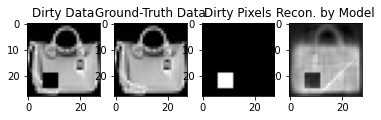

y_noise: 1


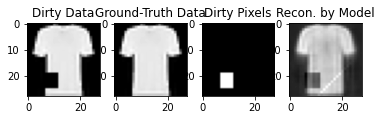

y_noise: 1


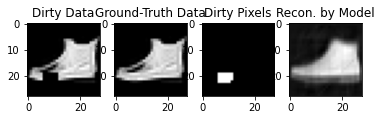

y_noise: 1


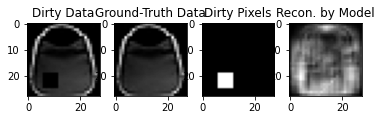

y_noise: 1


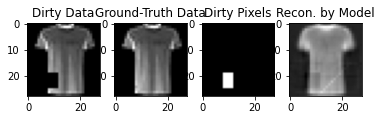

y_noise: 1


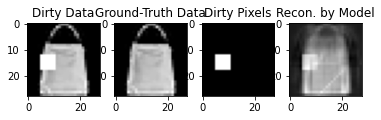

y_noise: 1


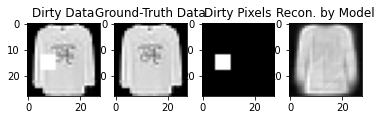

y_noise: 1


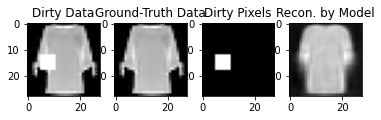

y_noise: 1


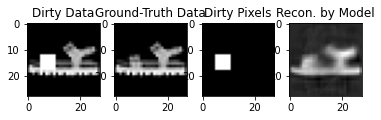

y_noise: 1


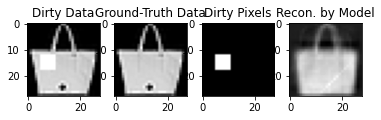

y_noise: 1


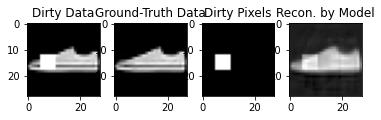

y_noise: 1


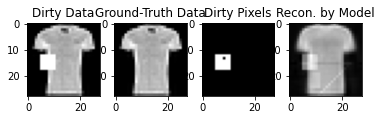

y_noise: 1


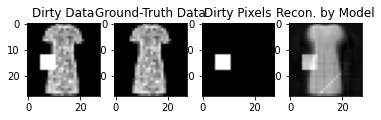

y_noise: 1


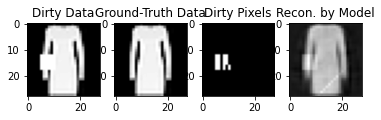

y_noise: 1


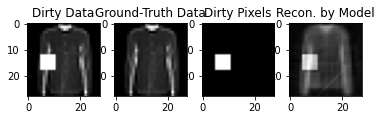

y_noise: 1


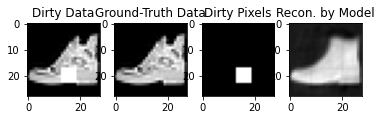

y_noise: 1


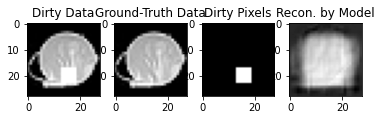

y_noise: 1


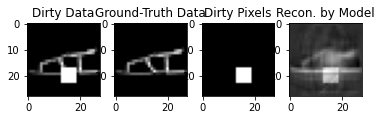

y_noise: 1


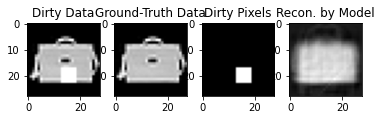

y_noise: 1


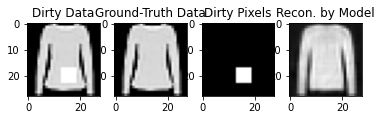

y_noise: 1


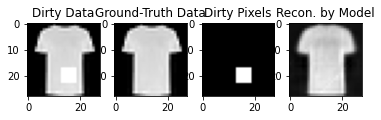

y_noise: 1


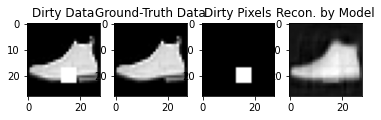

y_noise: 1


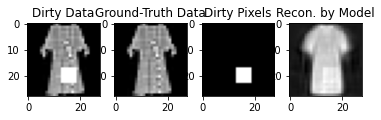

y_noise: 1


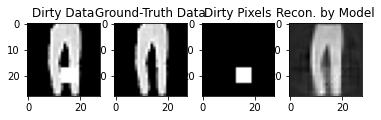

y_noise: 1


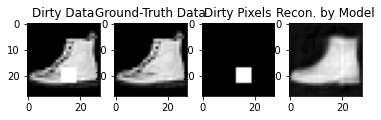

y_noise: 0


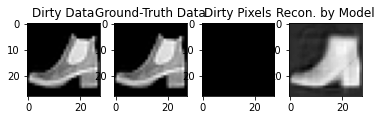

y_noise: 0


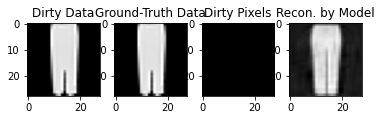

y_noise: 1


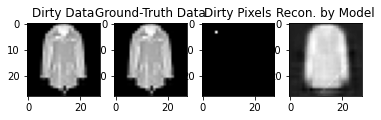

y_noise: 0


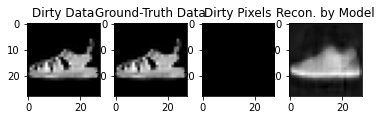

y_noise: 1


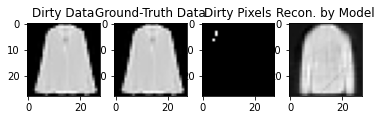

y_noise: 0


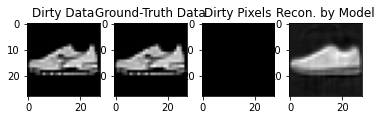

y_noise: 0


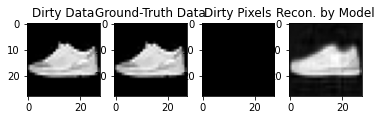

y_noise: 0


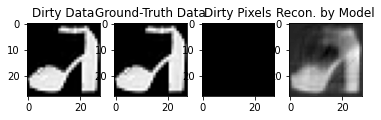

y_noise: 0


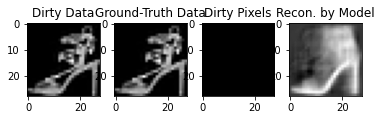

y_noise: 0


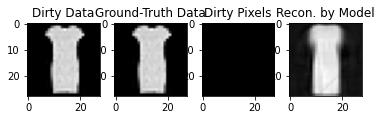

y_noise: 0


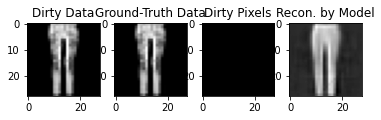

y_noise: 1


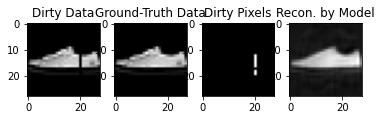

y_noise: 1


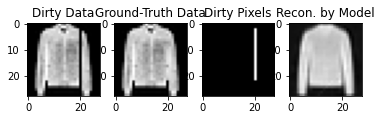

y_noise: 1


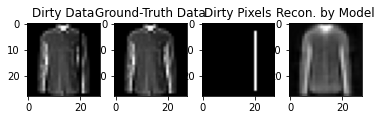

y_noise: 1


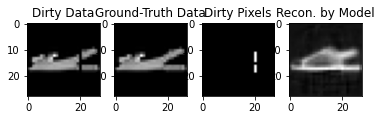

y_noise: 1


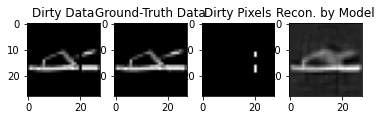

y_noise: 1


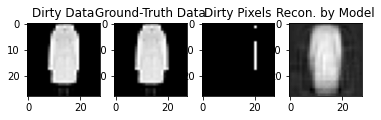

y_noise: 1


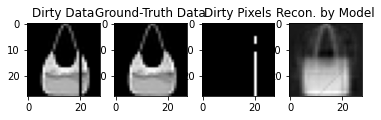

y_noise: 1


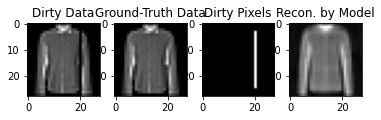

y_noise: 1


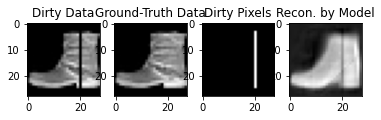

y_noise: 1


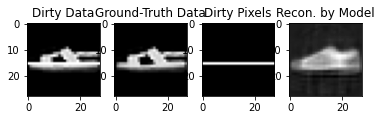

y_noise: 1


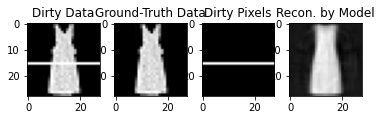

y_noise: 1


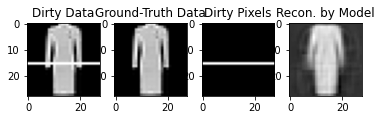

y_noise: 1


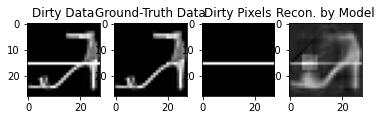

y_noise: 1


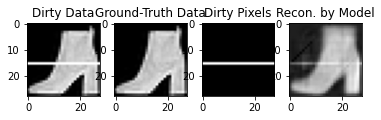

y_noise: 1


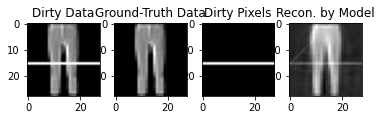

y_noise: 1


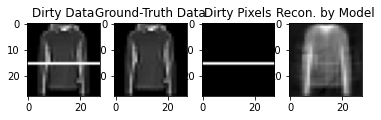

y_noise: 1


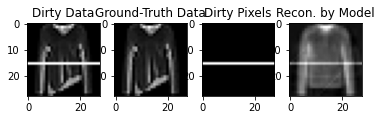

y_noise: 1


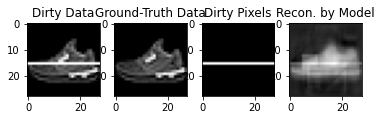

y_noise: 1


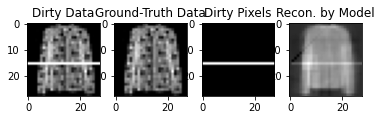

y_noise: 1


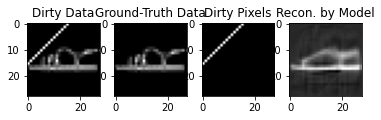

y_noise: 1


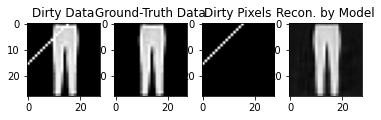

y_noise: 1


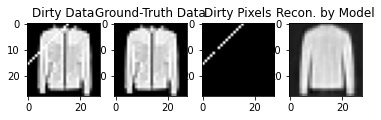

y_noise: 1


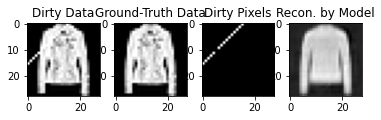

y_noise: 1


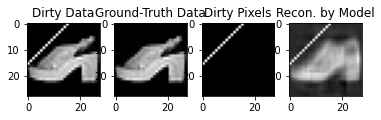

y_noise: 1


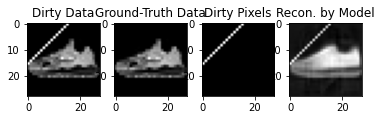

y_noise: 1


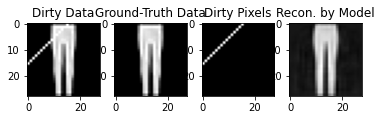

y_noise: 1


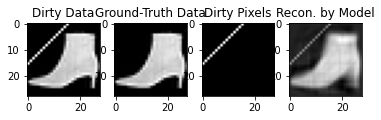

y_noise: 1


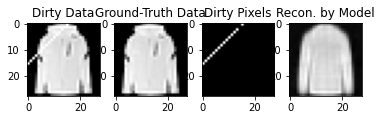

y_noise: 1


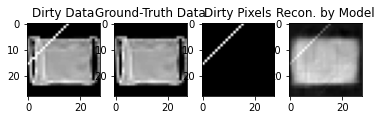

y_noise: 1


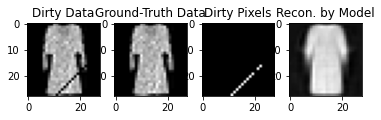

y_noise: 1


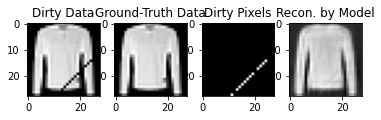

y_noise: 1


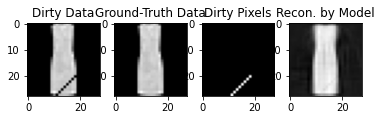

y_noise: 1


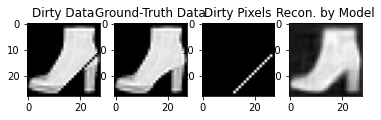

y_noise: 1


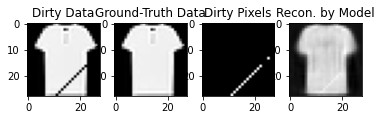

y_noise: 1


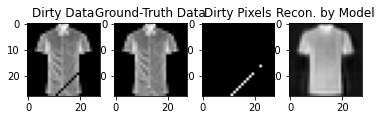

y_noise: 1


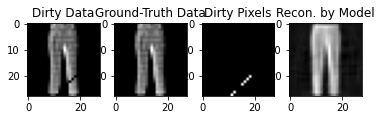

y_noise: 1


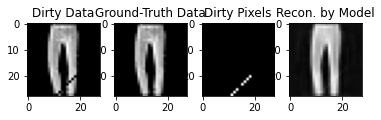

y_noise: 1


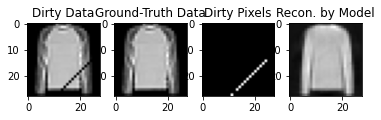

y_noise: 1


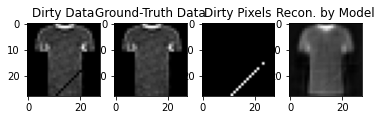

In [52]:
    
for idx in trusted_idxs_train:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray")
    ax[3].set_title("Recon. by Model")
    plt.show()


### Show Latent Space

In [53]:
# noised_rows = y_noise_instance_train
# noised_rows_str = ["Inlier" if not row_val else "Outlier" for row_val in noised_rows]

#### PCA

In [54]:
# from sklearn.decomposition import PCA

# all_z_train = np.concatenate([z_train_clean,z_train_dirty], axis=0)
# pca_2d_z = PCA(n_components=2) # PCA
# pca_2d_z.fit(all_z_train)

In [55]:
# pca_2d_z.explained_variance_

In [56]:
# z_train_pca2d_clean = pca_2d_z.transform(z_train_clean)
# z_train_pca2d_dirty = pca_2d_z.transform(z_train_dirty)

In [57]:
# df_plot_z_pca2d_y1 = pd.DataFrame({"x_1": z_train_pca2d_clean[:,0], 
#                                    "x_2": z_train_pca2d_clean[:,1], 
#                                    "type": noised_rows_str})
# sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y1)
# plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

In [58]:
# df_plot_z_pca2d_y0 = pd.DataFrame({"x_1": z_train_pca2d_dirty[:,0], 
#                                    "x_2": z_train_pca2d_dirty[:,1], 
#                                    "type": noised_rows_str})
# sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y0)
# plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

### Kernel PCA

In [59]:
# from sklearn.decomposition import KernelPCA

# kpca_2d_z = KernelPCA(n_components=2, kernel='rbf', degree=5)
# kpca_2d_z.fit(all_z_train)

In [60]:
# z_train_kpca2d_clean = kpca_2d_z.transform(z_train_clean)
# z_train_kpca2d_dirty = kpca_2d_z.transform(z_train_dirty)

In [61]:
# df_plot_z_kpca2d_y1 = pd.DataFrame({"x_1": z_train_kpca2d_clean[:,0], 
#                                     "x_2": z_train_kpca2d_clean[:,1], 
#                                     "type": noised_rows_str})
# sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_kpca2d_y1)
# plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

In [62]:
# df_plot_z_kpca2d_y0 = pd.DataFrame({"x_1": z_train_kpca2d_dirty[:,0], 
#                                     "x_2": z_train_kpca2d_dirty[:,1], 
#                                     "type": noised_rows_str})
# sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_kpca2d_y0)
# plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

#### T-SNE

In [63]:
# from sklearn.manifold import TSNE

In [64]:
# tsne_2d_z = TSNE(n_components=2, perplexity=180.0, n_iter=5000)
# _z_all_2d = tsne_2d_z.fit_transform(all_z_train)

In [65]:
# _len_dataset = z_train_pca2d_clean.shape[0]

# z_train_tsne2d_clean = _z_all_2d[:_len_dataset]
# z_train_tsne2d_dirty = _z_all_2d[_len_dataset:]

In [66]:
# df_plot_z_tsne2d_y1 = pd.DataFrame({"x_1": z_train_tsne2d_clean[:,0], 
#                                    "x_2": z_train_tsne2d_clean[:,1], 
#                                    "type": noised_rows_str})
# sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_tsne2d_y1)
# plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

In [67]:
# df_plot_z_tsne2d_y0 = pd.DataFrame({"x_1": z_train_tsne2d_dirty[:,0], 
#                                    "x_2": z_train_tsne2d_dirty[:,1], 
#                                    "type": noised_rows_str})
# sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_tsne2d_y0)
# plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

### Approx. Log-Likelihood

In [68]:
from repair_syserr_models.loss_utils import log_px_approx_eval

In [69]:
# TODO: insert option for cuda vs. cpu !!
x_inputs = X_train.cuda()
vae_mdl.cuda();


In [70]:
with torch.autograd.profiler.profile(use_cuda=True, profile_memory=True) as prof:

    # log p(x|y) evaluation, for both y=1 and y=0
    elbo_iwae_map = log_px_approx_eval(vae_mdl,
                                       dataset_obj,
                                       x_inputs,
                                       k_samples=250,
                                       y_comps=True,
                                       batch_size=128)

    # to clear GPU Mem -- if used.
    log_px_est_y1 = elbo_iwae_map["y1"].clone().cpu()
    log_px_est_y0 = elbo_iwae_map["y0"].clone().cpu()
    
    del elbo_iwae_map["y1"]
    del elbo_iwae_map["y0"]
    del elbo_iwae_map
    torch.cuda.empty_cache()


Compute Progress: 100%|███████████████████████████████████████████| 422/422 [00:09<00:00, 42.22it/s]


In [71]:
# print(prof)

In [72]:
arrs_elbo_iwae = np.concatenate([log_px_est_y1,log_px_est_y0,y_noise_instance_train.reshape(-1,1)], axis=1)

df_elbo_iwae = pd.DataFrame(arrs_elbo_iwae, columns=["log_px_y1", "log_px_y0", "noise_label"])
df_elbo_iwae["noise_label"] = df_elbo_iwae["noise_label"].apply(lambda x: "dirty" if x==1 else "clean")

In [73]:
df_elbo_iwae

log_px_y1   log_px_y0 noise_label
0       88.988083   82.984444       clean
1      369.457886  363.140350       clean
2     -488.970123 -478.177063       dirty
3      278.165192  278.313782       clean
4      620.352783  616.100891       clean
...           ...         ...         ...
53995  361.389313  356.814423       clean
53996   79.971001   80.983833       clean
53997  565.617798  562.035156       clean
53998  528.497742  524.214172       clean
53999  547.451294  545.992981       clean

[54000 rows x 3 columns]

In [74]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    

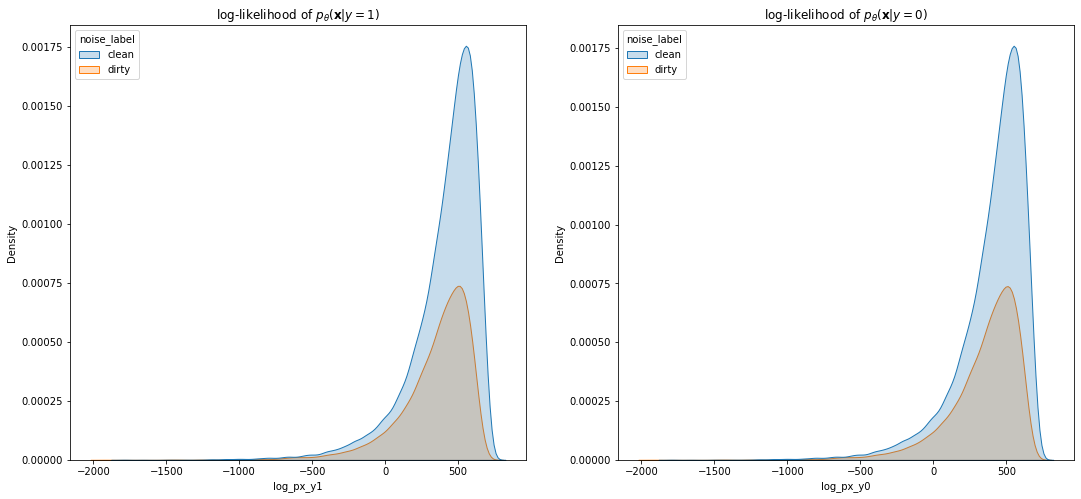

In [75]:
fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.kdeplot(ax=axes[0], data=df_elbo_iwae, x="log_px_y1", hue="noise_label", fill=True, legend=True)

axes[0].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes[0], "upper left")


sns.kdeplot(ax=axes[1], data=df_elbo_iwae, x="log_px_y0", hue="noise_label", fill=True, legend=True)

axes[1].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=0)$")
move_legend(axes[1], "upper left")


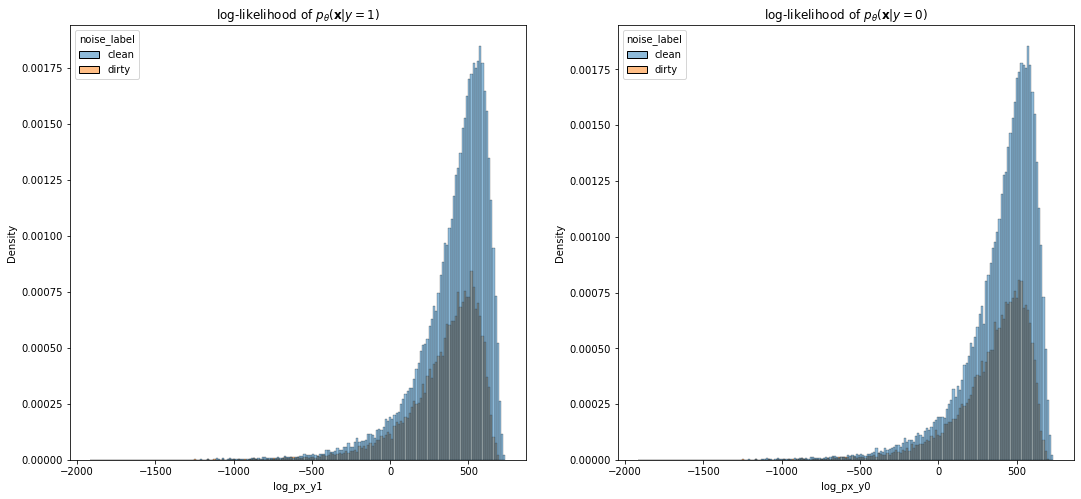

In [76]:
fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.histplot(ax=axes[0], data=df_elbo_iwae, x="log_px_y1", hue="noise_label", legend=True, stat="density")
axes[0].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes[0], "upper left")

sns.histplot(ax=axes[1], data=df_elbo_iwae, x="log_px_y0", hue="noise_label", legend=True, stat="density")
axes[1].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=0)$")
move_legend(axes[1], "upper left")


In [77]:
def epdf(xs, bins):
    xmin, xmax = np.inf, -np.inf
    for xi in xs:
        xmin = min(xmin, np.nanmin(xi))
        xmax = max(xmax, np.nanmax(xi))
    bin_range = (xmin, xmax)
    bins = np.lib.histograms.histogram_bin_edges(np.concatenate(xs), bins, bin_range)
    tops = []
    for xi in xs:
        m, _ = np.histogram(xi, bins, density=True)
        tops.append(m.astype(float))
    return tops, bins


In [78]:
tops, bin_edges = epdf([log_px_est_y1.numpy().flatten()[~y_noise_instance_train], log_px_est_y1.numpy().flatten()[y_noise_instance_train]], 25)
top_model, top_data = tops[0], tops[1]

In [79]:
np.sum(np.abs(top_model - top_data))

0.0025705734307218224

In [80]:
def histogram_intersection(h1, h2, bins):
    bins = np.diff(bins)
    sm = 0
    for i in range(len(bins)):
        sm += min(bins[i]*h1[i], bins[i]*h2[i])
    return sm

In [81]:
histogram_intersection(tops[0], tops[1], bin_edges)

0.8636133083000568